## <font color=orange> Video Game Sales Predictions
<font color=orange> **John Strada**


In [1]:
# Allows multiple outputs from a single cell:
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"
!pip -q install -U statsmodels > log.txt   # ensures no FutureWarnings from statsmodels

import numpy as np, pandas as pd, matplotlib as mpl, matplotlib.pyplot as plt, scipy, seaborn as sns, statsmodels.api as sm, pprint
import sklearn as sk, platform, datetime, statistics as stats
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split as tts
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import random
import math
from math import floor
from termcolor import colored

# load data and create dataframe df
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/video_games/video_games.csv')

### *** Videogames Dataset *** ###

### Dataset Column Descriptions

*** Explanatory Variable(s) ***
*   game: name of the game
*   noplayers: the maximum number of players that can play the game
*   genre: the main genre category of the game
*   publish: the name of the game publisher
*   revscore: the review score of the game
*   priceused: the average price of the game when bought used
*   console: the name of the console that the game is playable on
*   rating: the ESRB video game rating
*   year: the year of the game's release
*   com_lenavg: the average time (hours) to complete all of the game features (story + bonus) as reported by individual gamer responses
*   mainstory_lenavg: the average time (hours) to complete the main story of the game as reported by individual gamer responses

*** Response Variable ***
*   sale: the total game copies sold


### 1. - Insights about the data structure

Why: Examining the data structure provides initial insight into the features and observations in the dataset.
1. The games dataset has 1212 observations.
2. There are 36 variables.
3. All variables have no null values, except the `Publishers` variable with 246 missing values.
4. Most variables are floats (18).
5. Five variables are objects: `Title` of the game, `genre`, `publisher`, `console`, and `rating` *(E = Everybody, M = Mature, T = Teen)*.

In [2]:
# Evaluate the data structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Title                          1212 non-null   object 
 1   Features.Handheld?             1212 non-null   bool   
 2   Features.Max Players           1212 non-null   int64  
 3   Features.Multiplatform?        1212 non-null   bool   
 4   Features.Online?               1212 non-null   bool   
 5   Metadata.Genres                1212 non-null   object 
 6   Metadata.Licensed?             1212 non-null   bool   
 7   Metadata.Publishers            948 non-null    object 
 8   Metadata.Sequel?               1212 non-null   bool   
 9   Metrics.Review Score           1212 non-null   int64  
 10  Metrics.Sales                  1212 non-null   float64
 11  Metrics.Used Price             1212 non-null   float64
 12  Release.Console                1212 non-null   o

### 2. Insights about the first few files
Why: The first few files provides more specifics about the information found in the dataset and allows us to become acquainted with the tabluar structure.
1. Many of the numerical variables will need formating.
2. Some observations in the `genre` variable have more than one value (e.g. 'Action,Racing / Driving,Sports').
3. Some column names are very long and in unreadable formats (e.g. `Length.Completionists.Average`).
4. Quite a few variables will not be needed in the predicting model (e.g. `Length.All PlayStyles.Leisure`).
5. Some games were released for a different console than the publishing company (e.g. the game 'Spider-Man 2' was released for 'Nintendo DS', but was not published by 'Nintendo'. Instead, it was published by 'Activision').

In [3]:
# Provides a summary view of the first few observations, transposed for readability

df.head().T

,0,1,2,3,4
Title,Super Mario 64 DS,Lumines: Puzzle Fusion,WarioWare Touched!,Hot Shots Golf: Open Tee,Spider-Man 2
Features.Handheld?,True,True,True,True,True
Features.Max Players,1,1,2,1,1
Features.Multiplatform?,True,True,True,True,True
Features.Online?,True,True,True,True,True
Metadata.Genres,Action,Strategy,"Action,Racing / Driving,Sports",Sports,Action
Metadata.Licensed?,True,True,True,True,True
Metadata.Publishers,Nintendo,Ubisoft,Nintendo,Sony,Activision
Metadata.Sequel?,True,True,True,True,True
Metrics.Review Score,85,89,81,81,61


### *** Feature Engineeering *** ###

In [4]:
# Rename the columns to shorter and more readable formats

df.rename(columns={'Title':'game','Features.Handheld?':'handheld','Features.Max Players':'noplayers','Features.Multiplatform?':'multiplat','Features.Online?':'online','Metadata.Genres':'genre','Metadata.Licensed?':'license',
          'Metadata.Publishers':'publish','Metadata.Sequel?':'sequel','Metrics.Review Score':'revscore','Metrics.Sales':'sales','Metrics.Used Price':'priceused','Release.Console':'console','Release.Rating':'rating','Release.Re-release?':'rerel',
          'Release.Year':'year','Length.All PlayStyles.Average':'all_lenavg','Length.All PlayStyles.Leisure':'all_lenlei','Length.All PlayStyles.Median':'all_lenmed','Length.All PlayStyles.Polled':'all_lenpoll',
          'Length.All PlayStyles.Rushed':'all_lenrush','Length.Completionists.Average':'com_lenavg','Length.Completionists.Leisure':'com_lenlei','Length.Completionists.Median':'com_lenmed','Length.Completionists.Polled':'com_lenpoll',
          'Length.Completionists.Rushed':'com_lenrush','Length.Main + Extras.Average':'mainext_lenavg','Length.Main + Extras.Leisure':'mainext_lenlei','Length.Main + Extras.Median':'mainext_lenmed','Length.Main + Extras.Polled':'mainext_lenpoll',
          'Length.Main + Extras.Rushed':'mainext_lenrush','Length.Main Story.Average':'mainstory_lenavg','Length.Main Story.Leisure':'mainstory_lenlei','Length.Main Story.Median':'mainstory_lenmed','Length.Main Story.Polled':'mainstory_lenpoll',
          'Length.Main Story.Rushed':'mainstory_lenrush'},inplace=True);

In [5]:
# Print transposed for readability the first few rows to check column transformations 

df.head().T

,0,1,2,3,4
game,Super Mario 64 DS,Lumines: Puzzle Fusion,WarioWare Touched!,Hot Shots Golf: Open Tee,Spider-Man 2
handheld,True,True,True,True,True
noplayers,1,1,2,1,1
multiplat,True,True,True,True,True
online,True,True,True,True,True
genre,Action,Strategy,"Action,Racing / Driving,Sports",Sports,Action
license,True,True,True,True,True
publish,Nintendo,Ubisoft,Nintendo,Sony,Activision
sequel,True,True,True,True,True
revscore,85,89,81,81,61


In [6]:
# Checks and provides a count of all missing values in each column

df.isnull().sum()

game                   0
handheld               0
noplayers              0
multiplat              0
online                 0
genre                  0
license                0
publish              264
sequel                 0
revscore               0
sales                  0
priceused              0
console                0
rating                 0
rerel                  0
year                   0
all_lenavg             0
all_lenlei             0
all_lenmed             0
all_lenpoll            0
all_lenrush            0
com_lenavg             0
com_lenlei             0
com_lenmed             0
com_lenpoll            0
com_lenrush            0
mainext_lenavg         0
mainext_lenlei         0
mainext_lenmed         0
mainext_lenpoll        0
mainext_lenrush        0
mainstory_lenavg       0
mainstory_lenlei       0
mainstory_lenmed       0
mainstory_lenpoll      0
mainstory_lenrush      0
dtype: int64

In [7]:
### Dealing with missing values ###

# creates a unique selection of publishers
publish_list = df['publish'].dropna().unique()

# fills publish column missing values with random values from the publish column

#get mask of NaNs
m = df['publish'].isnull()
#count rows with NaNs
l = m.sum()
#create array with size l
s = np.random.choice(publish_list, size=l)
#set NaNs values
df.loc[m, 'publish'] = s

In [8]:
# Displays a count of all the publishers to identify any possible data biases or values to clean

pd.Series(df.publish.values.ravel()).dropna().value_counts()

EA                      173
Ubisoft                  99
Activision               98
Nintendo                 94
Sega                     86
THQ                      75
Sony                     68
2K                       61
Konami                   58
SquareEnix               42
Capcom                   42
Namco                    40
Atari                    34
Microsoft                31
Eidos                    29
Midway                   26
Rockstar                 23
Disney                   23
Sony,Ubisoft             13
Nintendo,Sega            13
EA,Sony                  12
Namco,Sony               11
Atari,Namco              11
EA,Namco                 10
Capcom,Rockstar           9
Namco,Ubisoft             8
Activision,Konami         6
Microsoft,SquareEnix      6
Capcom,Nintendo           5
Nintendo,SquareEnix       4
Activision,Sony           2
dtype: int64

In [9]:
# renames observations with multiple publishers to single publishers

# converting publishers
df['publish'].replace(to_replace='Atari,Namco',value='Atari',inplace=True)
df['publish'].replace(to_replace='Nintendo,Sega',value='Sega',inplace=True)
df['publish'].replace(to_replace='Sony,Ubisoft',value='Sony',inplace=True)
df['publish'].replace(to_replace='Namco,Sony',value='Namco',inplace=True)
df['publish'].replace(to_replace='EA,Namco',value='Namco',inplace=True)
df['publish'].replace(to_replace='Capcom,Rockstar',value='Rockstar',inplace=True)
df['publish'].replace(to_replace='Nintendo,SquareEnix',value='SquareEnix',inplace=True)
df['publish'].replace(to_replace='EA,Sony',value='Sony',inplace=True)
df['publish'].replace(to_replace='Microsoft,SquareEnix',value='Microsoft',inplace=True)
df['publish'].replace(to_replace='Activision,Sony',value='Sony',inplace=True)
df['publish'].replace(to_replace='Capcom,Nintendo',value='Capcom',inplace=True)
df['publish'].replace(to_replace='Activision,Konami',value='Konami',inplace=True)
df['publish'].replace(to_replace='Namco,Ubisoft',value='Namco',inplace=True)

In [10]:
# Ccount of All Genres

# Identify any areas that may need to be combined

pd.Series(df.genre.values.ravel()).dropna().value_counts()

Action                                                  476
Sports                                                  166
Strategy                                                 62
Action,Role-Playing (RPG)                                55
Racing / Driving                                         53
Role-Playing (RPG)                                       52
Action,Strategy                                          45
Action,Racing / Driving                                  40
Simulation                                               30
Action,Simulation                                        28
Action,Adventure                                         28
Adventure                                                21
Role-Playing (RPG),Strategy                              20
Action,Sports                                            20
Racing / Driving,Sports                                  19
Simulation,Strategy                                      12
Racing / Driving,Simulation,Sports      

In [11]:
### *** Feature Transformation *** ###

### Rename observations with multiple genres to single genres ###

# converting action genres
df['genre'].replace(to_replace='Action,Adventure',value='Adventure',inplace=True)
df['genre'].replace(to_replace='Action,Adventure,Role-Playing (RPG)',value='Role-Playing',inplace=True)
df['genre'].replace(to_replace='Action,Adventure,Strategy',value='Strategy',inplace=True)
df['genre'].replace(to_replace='Action,Adventure,Racing / Driving',value='Action',inplace=True)
df['genre'].replace(to_replace='Action,Adventure,Racing / Driving,Sports',value='Action',inplace=True)
df['genre'].replace(to_replace='Action,Educational',value='Educational',inplace=True)
df['genre'].replace(to_replace='Action,Racing / Driving',value='Racing_Driving',inplace=True)
df['genre'].replace(to_replace='Action,Racing / Driving,Role-Playing (RPG)',value='Action',inplace=True)
df['genre'].replace(to_replace='Action,Racing / Driving,Role-Playing (RPG),Strategy',value='Action',inplace=True)
df['genre'].replace(to_replace='Action,Racing / Driving,Simulation',value='Racing_Driving',inplace=True)
df['genre'].replace(to_replace='Action,Racing / Driving,Sports',value='Racing_Driving',inplace=True)
df['genre'].replace(to_replace='Action,Racing / Driving,Sports,Strategy',value='Action',inplace=True)
df['genre'].replace(to_replace='Action,Role-Playing (RPG)',value='Role-Playing',inplace=True)
df['genre'].replace(to_replace='Action,Role-Playing (RPG),Simulation',value='Role-Playing',inplace=True)
df['genre'].replace(to_replace='Action,Role-Playing (RPG),Simulation,Sports,Strategy',value='Action',inplace=True)
df['genre'].replace(to_replace='Action,Role-Playing (RPG),Strategy',value='Role-Playing',inplace=True)
df['genre'].replace(to_replace='Action,Simulation',value='Simulation',inplace=True)
df['genre'].replace(to_replace='Action,Simulation,Sports',value='Sports',inplace=True)
df['genre'].replace(to_replace='Action,Simulation,Strategy',value='Strategy',inplace=True)
df['genre'].replace(to_replace='Action,Sports',value='Sports',inplace=True)
df['genre'].replace(to_replace='Action,Strategy',value='Strategy',inplace=True)

# converting adventure genres
df['genre'].replace(to_replace='Adventure,Educational,Strategy',value='Educational',inplace=True)
df['genre'].replace(to_replace='Adventure,Role-Playing (RPG)',value='Role-Playing',inplace=True)
df['genre'].replace(to_replace='Adventure,Role-Playing (RPG),Strategy',value='Role-Playing',inplace=True)
df['genre'].replace(to_replace='Adventure,Simulation',value='Simulation',inplace=True)
df['genre'].replace(to_replace='Adventure,Simulation,Sports',value='Sports',inplace=True)

# converting educational genres
df['genre'].replace(to_replace='Educational,Simulation',value='Simulation',inplace=True)
df['genre'].replace(to_replace='Educational,Sports',value='Sports',inplace=True)
df['genre'].replace(to_replace='Educational,Strategy',value='Educational',inplace=True)

# converting racing genres
df['genre'].replace(to_replace='Racing / Driving',value='Racing_Driving',inplace=True)
df['genre'].replace(to_replace='Racing / Driving,Simulation',value='Racing_Driving',inplace=True)
df['genre'].replace(to_replace='Racing / Driving,Simulation,Sports',value='Racing_Driving',inplace=True)
df['genre'].replace(to_replace='Racing / Driving,Simulation,Strategy',value='Racing_Driving',inplace=True)
df['genre'].replace(to_replace='Racing / Driving,Sports',value='Racing_Driving',inplace=True)

# converting role-playing genres
df['genre'].replace(to_replace='Role-Playing (RPG)',value='Role_Playing',inplace=True)
df['genre'].replace(to_replace='Role-Playing (RPG),Simulation',value='Role_Playing',inplace=True)
df['genre'].replace(to_replace='Role-Playing (RPG),Simulation,Strategy',value='Role_Playing',inplace=True)
df['genre'].replace(to_replace='Role-Playing (RPG),Strategy',value='Role_Playing',inplace=True)
df['genre'].replace(to_replace='Role-Playing',value='Role_Playing',inplace=True)

# cnverting simulation genres
df['genre'].replace(to_replace='Simulation,Sports',value='Sports',inplace=True)
df['genre'].replace(to_replace='Simulation,Strategy',value='Strategy',inplace=True)
df['genre'].replace(to_replace='Simulation,Sports,Strategy',value='Sports',inplace=True)

#converting sports genres
df['genre'].replace(to_replace='Sports,Strategy',value='Sports',inplace=True)

In [12]:
### *** Dataset feature created calculations *** ###

#### Creating a grouping of publishers that share a similiar feature: Total Revenue ###: 
## [1] Small / < 15; [2] Medium / 15 <= 6; [3] Large / 5 <= 1

df['publish_grp'] = np.where((df['publish'] == 'Sony') | (df['publish'] == 'Nintendo') | (df['publish'] == 'Microsoft'),3, \
np.where(((df['publish'] == 'Activision') | (df['publish'] == 'EA') | df['publish'] == '2K') | (df['publish'] == 'Namco') | (df['publish'] == 'SquareEnix') | (df['publish'] == 'Ubisoft') | (df['publish'] == 'Konami') | (df['publish'] == 'Sega'),2,1))

### Creating a column that acccounts for a game appearing more than once in the dataset, i.e. on multiple platforms ###

df_grouped = df.groupby(['game']).agg(count_col=pd.NamedAgg(column='game', aggfunc="count"))
df = df.join(df_grouped,df['game'])

# using the count calculation to create a multi-system column to check whether a game was available on more than one system
df['multi_system'] = np.where(df['count_col'] == 1,0,1)

# dropping the calculated count column
df.drop(columns= ['count_col'], inplace=True)

### Creating a play type column (handheld versus console) variable:  ###
# 0 = console; 1 = handheld

df['play_ty'] = np.where(df['console'] == 'Nintendo DS',1,0)

# creating a scale ordered rating column - E:Everyone = 1, T:Teen = 2, M:Mature = 3
df['rating_sc'] = np.where(df['rating'] == 'E' ,1, np.where(df['rating'] == 'T',2,3))

# creating an extra time amount that calculates the difference between average completetionist story length and average main story length
df['xtr_time'] = (df['mainstory_lenavg'] + df['com_lenavg']) - df['mainstory_lenavg']

# creating a total time amount that calculates the total ggameplay between average completetionist story length and average main story length
df['tot_time'] = (df['mainstory_lenavg'] + df['com_lenavg'])

In [13]:
# drops columns that won't be used in the modeling
df.drop(columns=['all_lenavg','all_lenlei','all_lenmed','all_lenpoll',
          'all_lenrush','com_lenlei','com_lenmed','com_lenpoll',
          'com_lenrush','mainext_lenavg','mainext_lenlei','mainext_lenmed','mainext_lenpoll',
          'mainext_lenrush','mainstory_lenlei','mainstory_lenmed','mainstory_lenpoll','mainstory_lenrush', 'handheld', 'multiplat', 'online','license','sequel','rerel'], inplace=True);

### *** Exploratory Data Analysis *** ###

### 3. Insights from the numerical distributions
Why: Examining the distributions allows us to identify the various distribution characteristics including any tail features and any steps that may need to be taken to adjust the distirbutions closer to normality.

Most of the games 
1. are listed as having a maximum of one-player.
2. are listed with having sales less than 1 million copies.
3. cost between `$`10 and `$`20.
4. were released in the year of 2007.
5. have a review score of about 70.

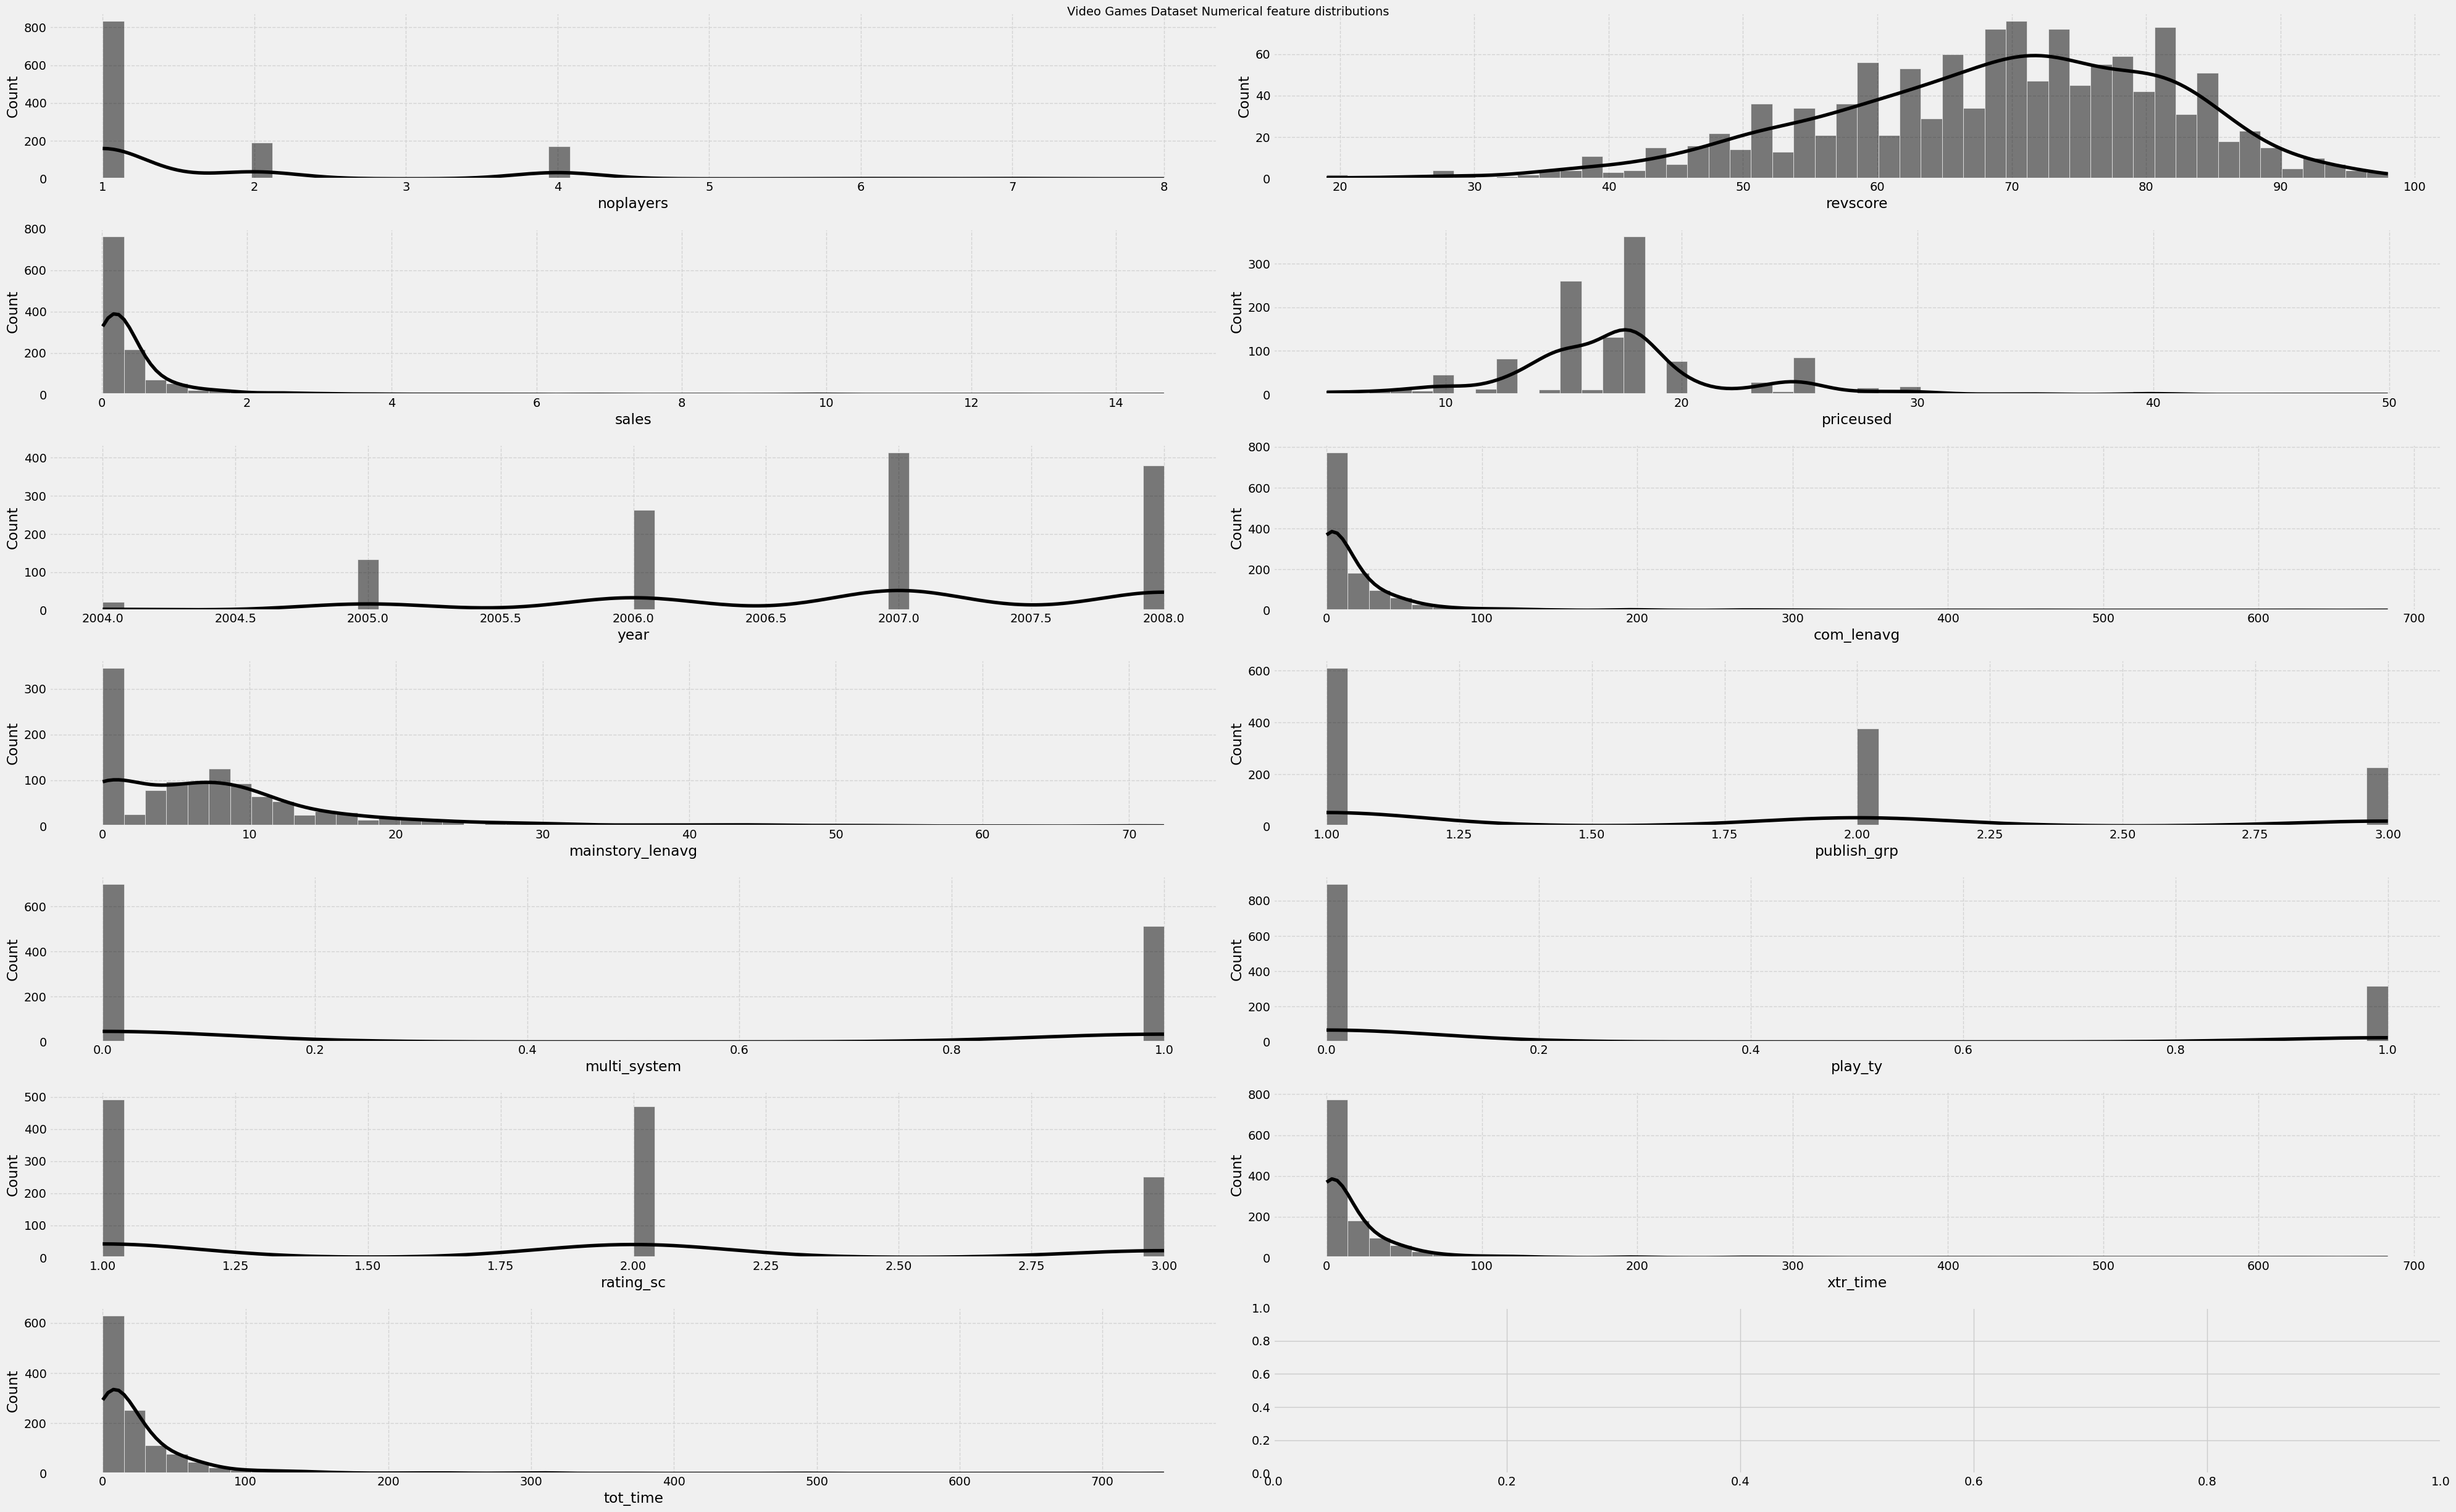

In [14]:
### Analyzing numerical feature distributions ###

plt.style.use('fivethirtyeight')

Num_Ftre_Lst = list(df.select_dtypes(include= np.number).columns)

# visualization credit: https://www.kaggle.com/code/ravi20076/sptitanic-bootstrapensemble-pipeline
fig, ax = plt.subplots(7,2, figsize=(40,25), squeeze=True)
plt.suptitle(f"Video Games Dataset Numerical feature distributions", color= 'black', fontsize=14)
for i, col in enumerate(Num_Ftre_Lst):
    sns.histplot(x=df[col], bins=50, kde= True, color = 'black', ax=ax[floor(i/2), i%2])
    ax[floor(i/2), i%2].grid(visible= True, color= 'lightgrey', linestyle= '--', which= 'both')


plt.tight_layout()
plt.show();

### 4. Insights from statistics
Why: Allows us to consider the percentile and mean characteristics for the features while also helps to identify any potential outliers or errors that may need to be dealt with prior to modeling.
1. 75% of games are one-player games with a max number of players for a game at 8.
2. The average review score of games is 69, indicating a general consensus where 70 is okay on a 1 to 100 scale.
3. The highest reviewed game scored a 98.
4. Average game sales are around 500,000 with a maximum sales figure of 14.66 million copies sold. The bottom 25% of games sold, on average, less than 100,000 copies.
5. The skew and kurtosis of sales indicates that some games sold a very high number of copies while some sold a very low number of copies.

In [15]:
# provides summary statistics on dataframe for initial EDA
stats = df.describe()
stats.loc['IQR'] = stats.loc['75%'] - stats.loc['25%'] # appending interquartile range instead of recalculating it
stats = stats.append(df.reindex(stats.columns, axis=1).agg(['skew', 'mad', 'kurt']))

stats.drop('count', inplace=True)

mapper =  {'noplayers': '{0:.0f}', 'revscore': '{0:.0f}', 'sales': '{0:.2f}', 'priceused': '{0:.2f}', 'year': '{0:.0f}', 'mainstory_lenavg': '{0:.1f}'}
stats.style.format(mapper)

<ipython-input-15-ae89b3cc6da3>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats = stats.append(df.reindex(stats.columns, axis=1).agg(['skew', 'mad', 'kurt']))
<ipython-input-15-ae89b3cc6da3>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats = stats.append(df.reindex(stats.columns, axis=1).agg(['skew', 'mad', 'kurt']))
<ipython-input-15-ae89b3cc6da3>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats = stats.append(df.reindex(stats.columns, axis=1).agg(['skew', 'mad', 'kurt']))
<ipython-input-15-ae89b3cc6da3>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may

,noplayers,revscore,sales,priceused,year,com_lenavg,mainstory_lenavg,publish_grp,multi_system,play_ty,rating_sc,xtr_time,tot_time
mean,2,69,0.50,17.39,2007,19.808223,8.5,1.683993,0.423267,0.261551,1.801980,19.808223,28.274175
std,1,13,1.07,5.02,1,46.634546,9.7,0.767835,0.494281,0.439661,0.757280,46.634546,53.007570
min,1,19,0.01,4.95,2004,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1,60,0.09,14.95,2006,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,2.479167
50%,1,70,0.21,17.95,2007,6.000000,6.6,1.000000,0.000000,0.000000,2.000000,6.000000,12.600000
75%,2,79,0.46,17.95,2008,21.554167,11.0,2.000000,1.000000,1.000000,2.000000,21.554167,31.900000
max,8,98,14.66,49.95,2008,683.133333,72.4,3.000000,1.000000,1.000000,3.000000,683.133333,743.133333
IQR,1,19,0.37,3.00,2,21.554167,11.0,1.000000,1.000000,1.000000,1.000000,21.554167,29.420833
skew,2,-1,6.78,1.37,-1,7.084458,2.4,0.606797,0.310995,1.086487,0.346581,7.084458,6.342000
mad,1,10,0.50,3.29,1,22.712325,6.6,0.687380,0.488224,0.386284,0.649789,22.712325,27.657671


### *** Publishers *** ###

### 5. Insights about publishers
Why: Allows us to examine and better understand how publishers and in what ways they make-up the sales of games in the dataset.
1. The top publishers, EA, Ubisoft, & Nintendo, etc. are vastly more represented than the bottom publishers.
2. Creating a sales per publisher calculation shows that Nintendo, Microsoft, Rockstar, and Activision make-up 49.3% of the copies sold in the dataset.
3. This over-representation may lead to weight bias. We may consider creating publisher groupings that better group publishers that are alike based on a common aspect such as their typical overall revenue.

### FY 2020-2021 Top 19 Video Game Pubishers by Revenue
Source: https://en.wikipedia.org/wiki/Video_game_publisher

Name:	Country:	Revenue in $bn
1.	Sony Interactive Entertainment: Japan, United States:	18.190
2.	Tencent Games:	China:	16.224
3.	Nintendo:	Japan:	12.010
4.	Microsoft:	United States:	10.260
5.	NetEase:	China:	6.668
---
6.	Activision Blizzard:	United States:	6.388
7.	Electronic Arts:	United States:	5.537
8.	Take-Two Interactive:	United States:	3.089
9.	Bandai Namco Entertainment:	Japan:	3.018
10.	Square Enix:	Japan:	2.386
11.	Nexon:	South Korea, Japan:	2.286
12.	Netmarble:	South Korea:	1.883
13.	Ubisoft:	France:	1.446
14.	Konami:	Japan:	1.303
15.	Sega:	Japan:	1.153
---
16.	MiHoYo:	China:	0.855
17.	Capcom:	Japan:	0.7673
18.	Warner Bros. Interactive Entertainment:	United States:	0.7324
19.	Embracer Group:	Sweden:	0.3225

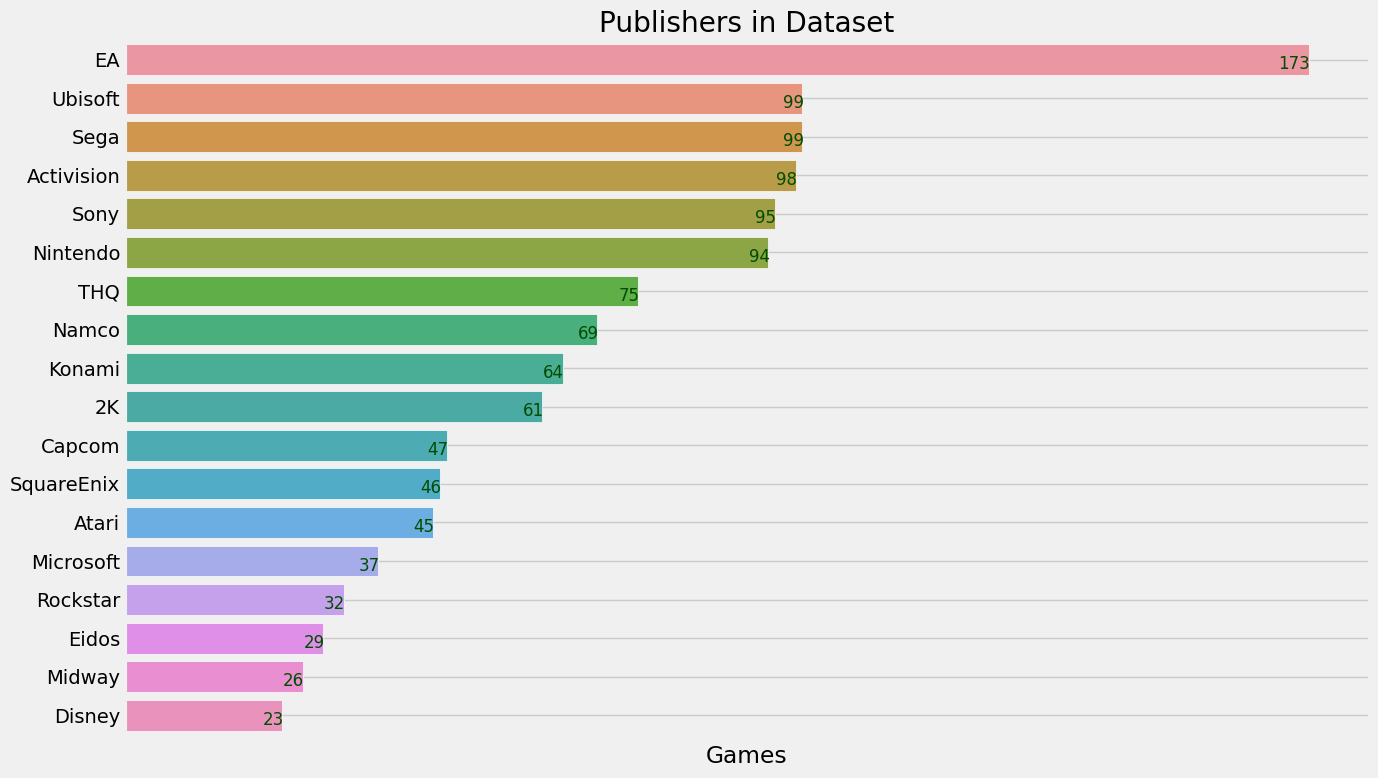

In [16]:
### Produce a visual of publisher counts after filling missing values ###

fig, ax = plt.subplots(figsize=(14, 8))
sns.set_style("white", {"grid.color": ".6", "grid.linestyle": ""})
sns.despine()
sort = df.groupby('publish').size().sort_values().index[::-1]
ax = sns.countplot(y=df['publish'], data=df['publish'],order=sort)
ax.set(xlabel = 'Games',
       ylabel = '',
       title = 'Publishers in Dataset')
for p in ax.patches:
   ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(1, -18),fontsize=12,color='#004d00',textcoords='offset points', horizontalalignment='right');
ax.set(xticklabels = []);
ax.tick_params(bottom=False)
plt.grid(visible=None)
plt.tight_layout();

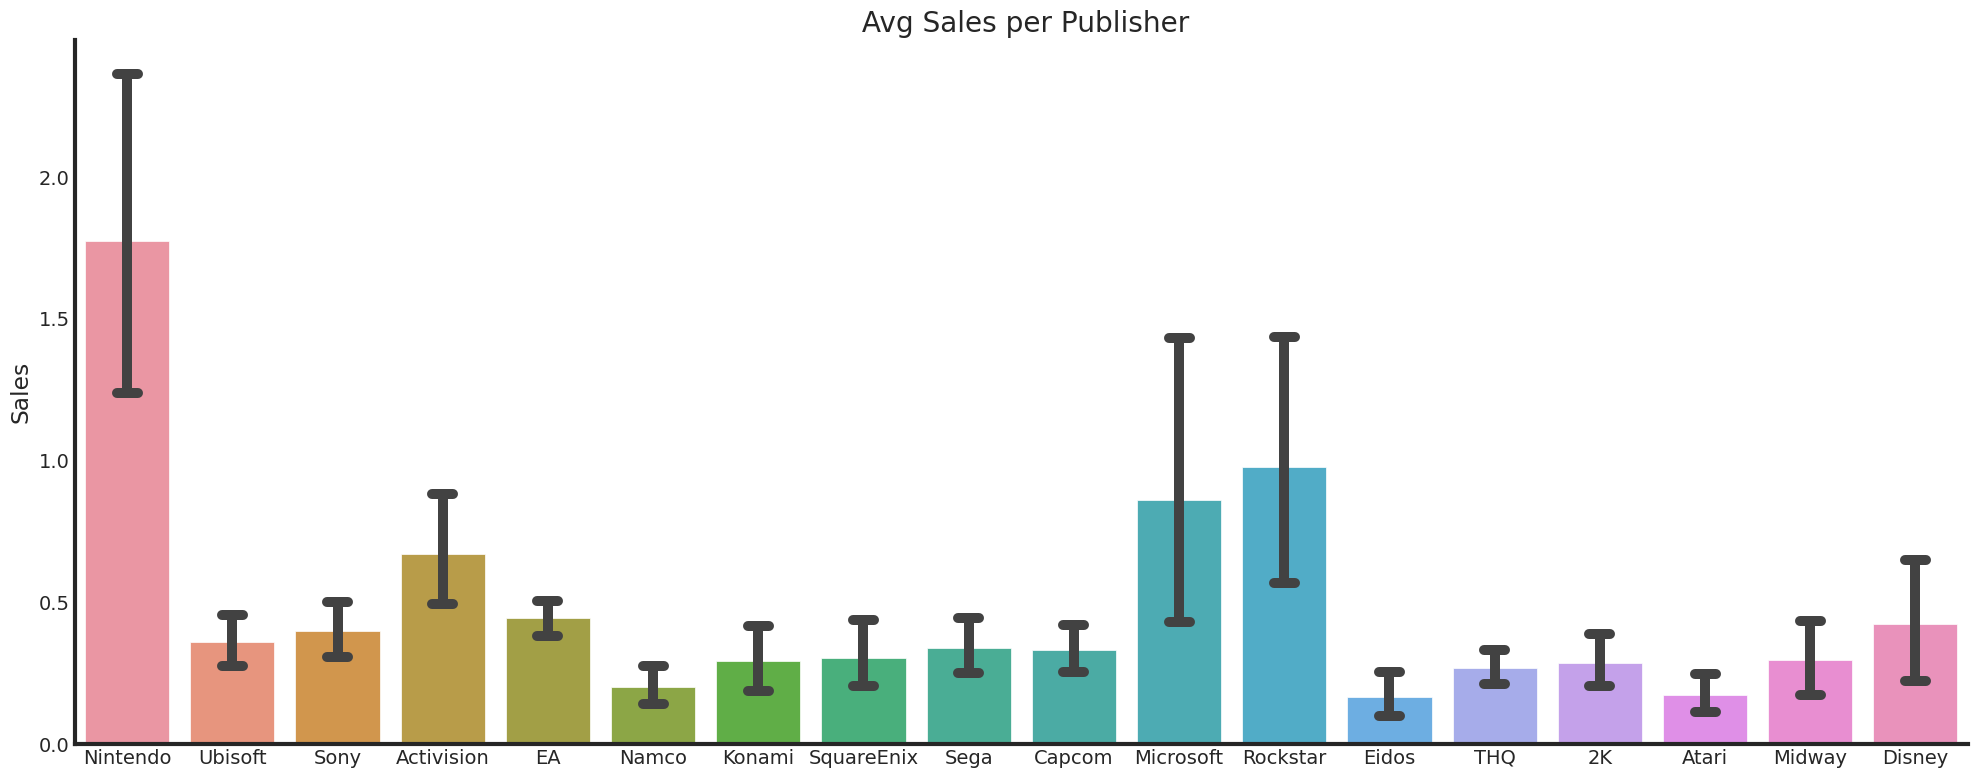

In [17]:
### Produce a visual of the average sales per publisher to identify any anomalies ###

fig, ax = plt.subplots(figsize=(20, 8))
#sort = df.groupby('genre',sort=False).sum()
# add the plot
sns.set_style("white", {"grid.color": ".6", "grid.linestyle": ""})
sns.barplot(x='publish', y='sales', data=df, capsize=0.2, ax=ax)
sns.despine()
# add the annotation
#ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')
ax.set(xlabel = '', ylabel='Sales', title = ' Avg Sales per Publisher')
plt.tight_layout()
plt.show();

In [18]:
### Copies Sold per Publisher per Game ### (In millions)

# calculate the total sales per publisher
publish_sales = df.groupby('publish')['sales'].sum()

# calcuate the total games of publisher
publish_games = df.groupby('publish')['game'].count()

# calculate the sales per publisher game
publish_sales_game = round(publish_sales / publish_games,2)

# creates a dataframe from series output
publish_sales_game.to_frame(name = 'publish_sales').reset_index()

,publish,publish_sales
0,2K,0.28
1,Activision,0.67
2,Atari,0.17
3,Capcom,0.33
4,Disney,0.42
5,EA,0.44
6,Eidos,0.17
7,Konami,0.29
8,Microsoft,0.86
9,Midway,0.30


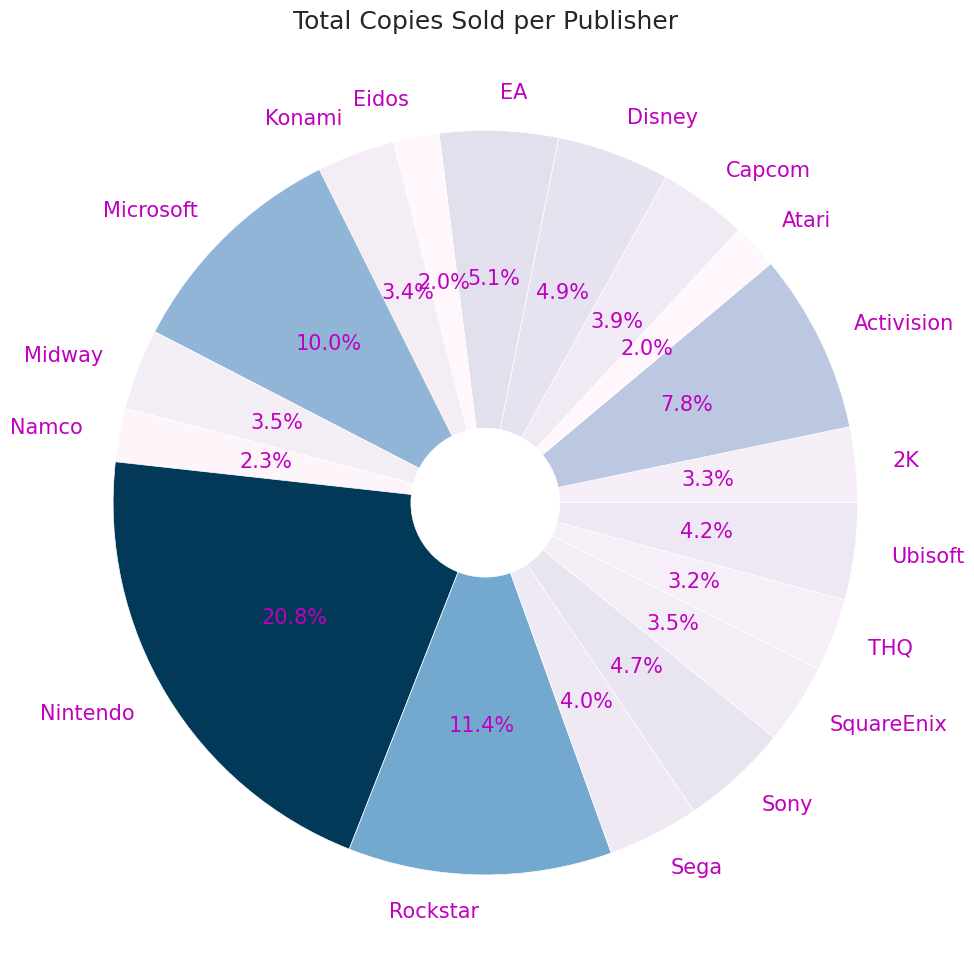

In [19]:
# create a visual of games sold per publisher. 
#visualization credit: https://thecleverprogrammer.com/2021/05/28/video-game-sales-prediction-model-with-python/

custom_colors = mpl.colors.Normalize(vmin=min(publish_sales_game), vmax=max(publish_sales_game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in publish_sales_game]
plt.figure(figsize=(10,10))
plt.pie(publish_sales_game, autopct='%1.1f%%', labels=publish_sales_game.index, colors=colours, textprops=dict(size = 15, color="m"))
central_circle = plt.Circle((0, 0), 0.2, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=14)
plt.title("Total Copies Sold per Publisher", fontsize=18)
plt.tight_layout()
plt.show();

### *** Genres *** ###

### 6. Insights about the genres
Why: Allows us to better examine the potential impact that the various genres may play in the modeling outcome.
1. Action genres, at 487, are represented 143% more than the second highest genre, `sports`, at 200.
2. The educational genre is only represented by five games.
3. Creating a sales per genre calculation shows that `simulation` and `racing_driving` games actually display the most sales per game than other genres.
4. `Adventure` and `Strategy` were sold the least.

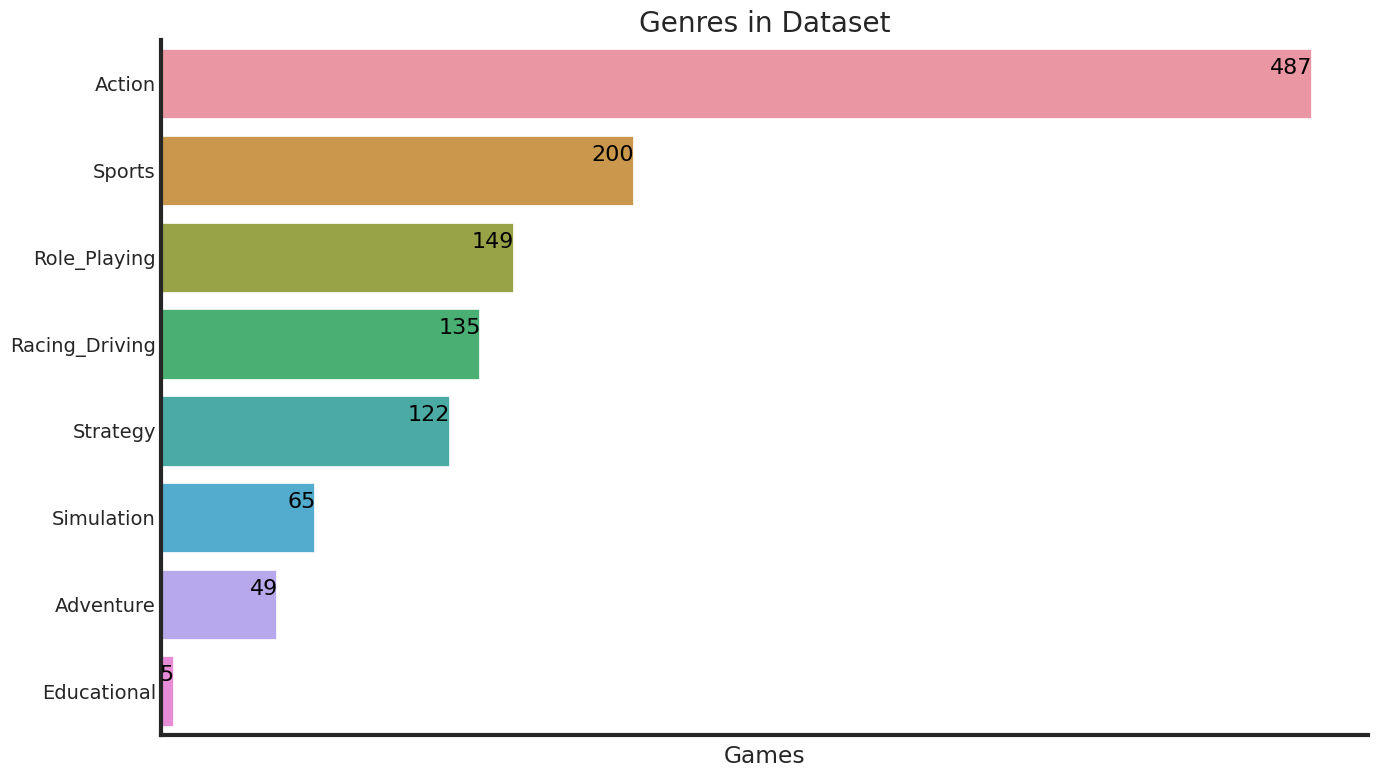

In [20]:
# Visual of combined genre counts

fig, ax = plt.subplots(figsize=(14, 8));
sort_genre = df.groupby('genre').size().sort_values().index[::-1];
ax = sns.countplot(y=df.genre, data=df.publish.value_counts(),order=sort_genre);
ax.set(xlabel = 'Games',
       ylabel = '',
       title = 'Genres in Dataset');
for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(1, -18),fontsize=16,color='000000',textcoords='offset points', horizontalalignment='right');
ax.set(xticklabels = []);
ax.tick_params(bottom=False)
sns.despine()
plt.tight_layout();

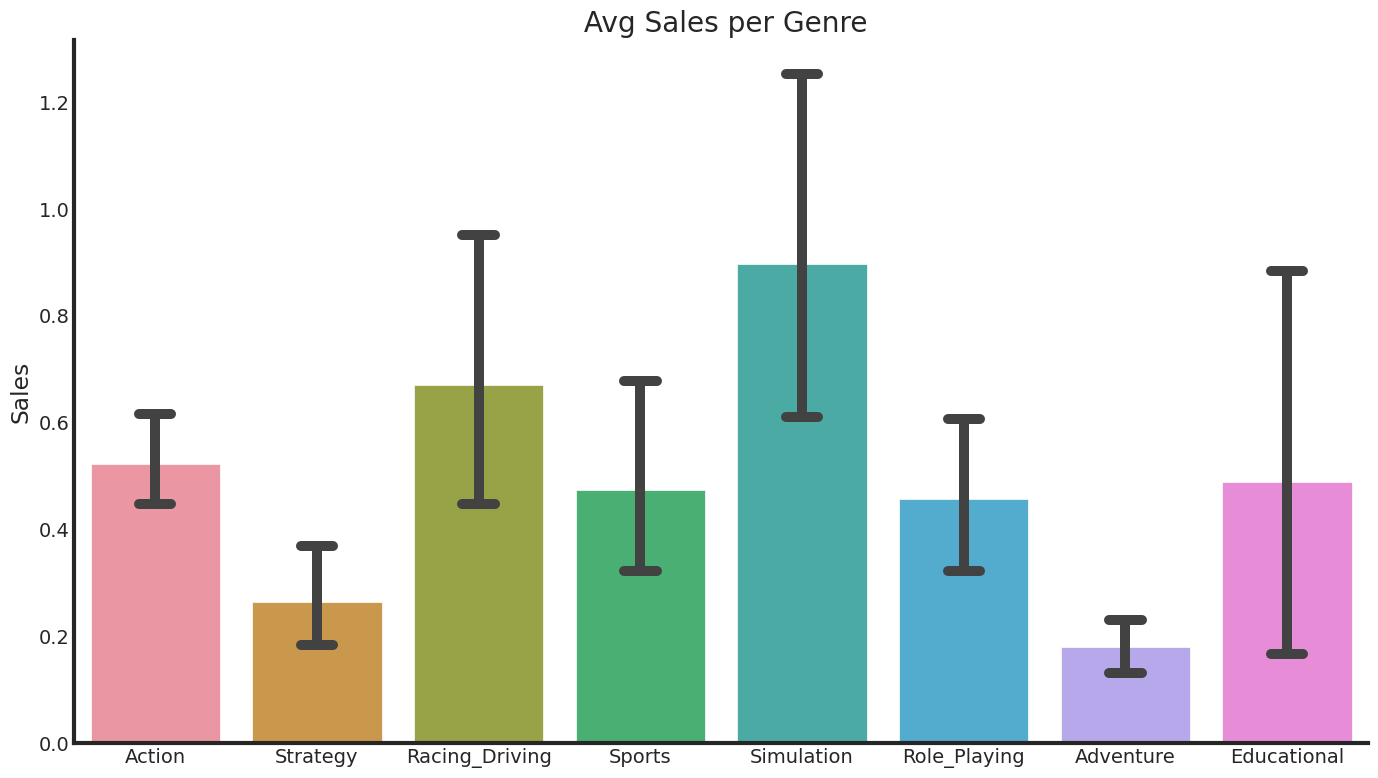

In [21]:
### *** Average Sales per Genre *** ###

fig, ax = plt.subplots(figsize=(14, 8))

# add the plot

sns.set_style("white", {"grid.color": ".6", "grid.linestyle": ""})
sns.barplot(x='genre', y='sales', data=df, capsize=0.2, ax=ax)
sns.despine()

# add the annotation

#ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')
ax.set(xlabel = '', ylabel='Sales', title = ' Avg Sales per Genre')
plt.tight_layout()
plt.show();

In [22]:
### *** Copies Sold per Genre per Game *** ### (In millions)

# Total sales per genre
genre_sales = df.groupby('genre')['sales'].sum()

# Total games of publisher
genre_games = df.groupby('genre')['game'].count()

# Sales per publisher game
genre_sales_game = round(genre_sales / genre_games,2)

# creates a dataframe from series output
genre_sales_game.to_frame(name = 'genre_sales').reset_index()

,genre,genre_sales
0,Action,0.52
1,Adventure,0.18
2,Educational,0.49
3,Racing_Driving,0.67
4,Role_Playing,0.46
5,Simulation,0.90
6,Sports,0.47
7,Strategy,0.26


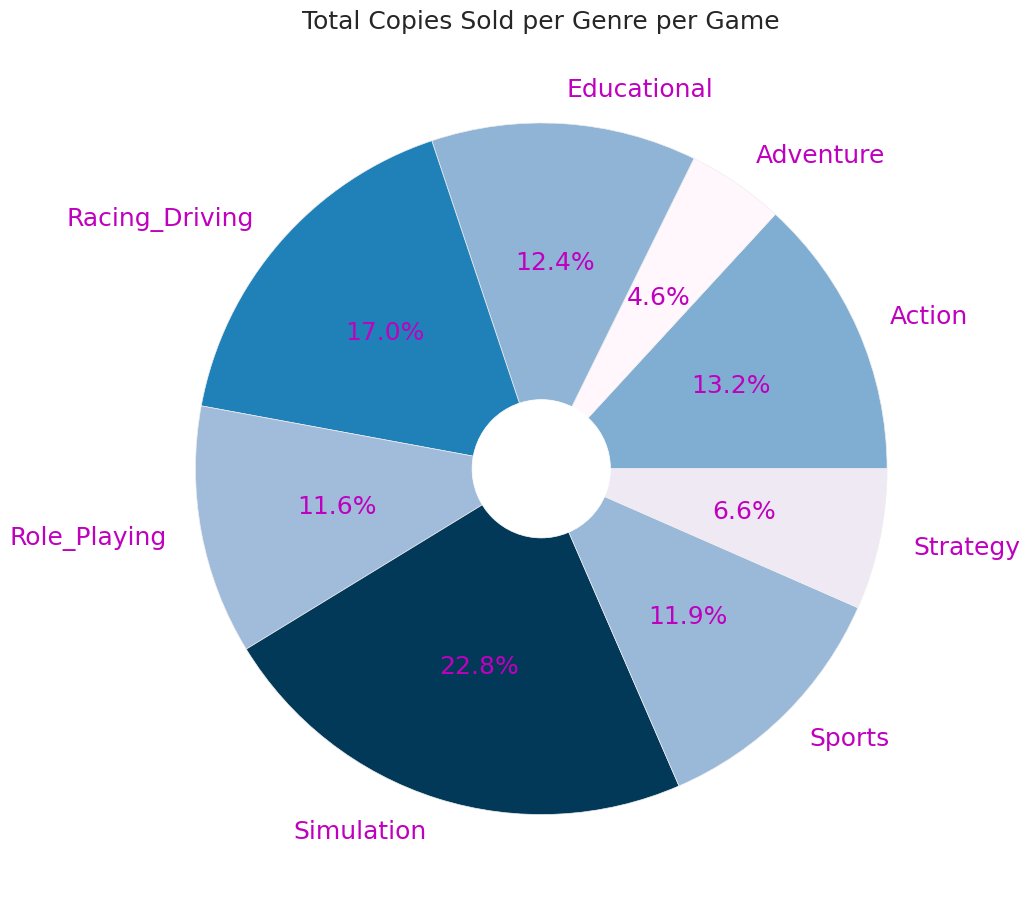

In [23]:
# Visualizing results

plt.style.use('ggplot')
custom_colors = mpl.colors.Normalize(vmin=min(genre_sales_game), vmax=max(genre_sales_game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in genre_sales_game]
plt.figure(figsize=(10,10))
plt.pie(genre_sales_game, autopct='%1.1f%%', labels=genre_sales_game.index, colors=colours, textprops=dict(size = 18, color="m"))
central_circle = plt.Circle((0, 0), 0.2, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=14)
plt.title("Total Copies Sold per Genre per Game", fontsize=18)
plt.tight_layout()
plt.show();

### 7. Insights from top selling games
Why: Better examining the top games may indicate shared features that are indicative to games that sell more copies.
1. Of the top selling games, a significant number are from the action genre.
2. Nintendo is highly represented in the top selling games.
3. The top selling game, Wii Play, has a very low review score of 58.
4. The top 5 selling games are either Nintendo Wii or Nintendo DS games.
5. The top 10 selling games are for an audience under the age of 18 years (either for teens (T) or everybody (E), the top 3 are for teens).

In [24]:
 # displays the top 25 selling games
df_top_games = pd.DataFrame(df.sort_values('sales',ascending=False).head(25))
df_top_games.reset_index(inplace=True, drop=True)
df_top_games

,game,noplayers,genre,publish,revscore,sales,priceused,console,rating,year,com_lenavg,mainstory_lenavg,publish_grp,multi_system,play_ty,rating_sc,xtr_time,tot_time
0,Wii Play,2,Sports,Nintendo,58,14.66,14.95,Nintendo Wii,T,2006,0.000000,4.083333,3,0,0,2,0.000000,4.083333
1,Mario Kart Wii,4,Racing_Driving,Nintendo,82,12.39,29.95,Nintendo Wii,T,2008,19.116667,5.700000,3,0,0,2,19.116667,24.816667
2,New Super Mario Bros.,1,Action,Nintendo,89,10.03,27.95,Nintendo DS,T,2006,17.066667,7.200000,3,0,1,2,17.066667,24.266667
3,Mario Kart DS,1,Racing_Driving,Nintendo,91,9.99,29.95,Nintendo DS,E,2005,16.383333,4.783333,3,0,1,1,16.383333,21.166667
4,Nintendogs,1,Simulation,Nintendo,83,9.72,26.95,Nintendo DS,E,2005,100.000000,27.966667,3,0,1,1,100.000000,127.966667
5,Wii Fit,1,Sports,Nintendo,80,9.60,24.95,Nintendo Wii,T,2007,0.000000,3.850000,3,0,0,2,0.000000,3.850000
6,Halo 3,4,Action,Microsoft,94,8.03,24.95,X360,E,2007,16.683333,8.866667,3,0,0,1,16.683333,25.550000
7,Pokmon Pearl,1,Role_Playing,Nintendo,85,6.77,26.95,Nintendo DS,E,2006,265.200000,42.633333,3,0,1,1,265.200000,307.833333
8,Pokmon Diamond,1,Role_Playing,Nintendo,85,6.77,27.95,Nintendo DS,E,2006,265.200000,42.633333,3,0,1,1,265.200000,307.833333
9,Call of Duty 4: Modern Warfare,4,Action,Activision,94,5.77,29.95,X360,E,2007,16.650000,6.750000,1,1,0,1,16.650000,23.400000


In [25]:
# statistics about the top selling games
stats = df_top_games.describe()
stats.drop('count', inplace=True)
mapper =  {'noplayers': '{0:.0f}', 'revscore': '{0:.0f}', 'sales': '{0:.2f}', 'priceused': '{0:.2f}', 'year': '{0:.0f}', 'com_lenavg':'{0:.1f}', 'mainstory_lenavg': '{0:.1f}', 'rating_sc': '{0:.1f}', 'xtr_time': '{0:.1f}', \
           'tot_time': '{0:.1f}', 'publish_grp': '{0:.1f}', 'play_ty': '{0:.1f}'}
stats.style.format(mapper)

,noplayers,revscore,sales,priceused,year,com_lenavg,mainstory_lenavg,publish_grp,multi_system,play_ty,rating_sc,xtr_time,tot_time
mean,2,85,6.31,26.63,2007,56.1,13.8,2.6,0.200000,0.4,1.6,56.1,70.0
std,1,11,3.12,7.72,1,77.1,12.7,0.8,0.408248,0.5,0.7,77.1,87.3
min,1,58,3.20,12.95,2004,0.0,0.9,1.0,0.000000,0.0,1.0,0.0,1.9
25%,1,80,3.90,24.95,2006,8.0,5.7,3.0,0.000000,0.0,1.0,8.0,16.0
50%,1,85,5.07,26.95,2007,19.1,8.2,3.0,0.000000,0.0,1.0,19.1,27.1
75%,2,94,8.03,29.95,2007,83.0,15.3,3.0,0.000000,1.0,2.0,83.0,105.5
max,6,98,14.66,39.95,2008,265.2,42.6,3.0,1.000000,1.0,3.0,265.2,307.8


### *** Correlation Matrix *** ###

### Correlation Matrix
Why: The correlation matrix helps us to examine any significant relationships that may exist between the response variable (sales) and the predictor variables. Additioanlly, it allows us to look for any highly correlated varaibles that may overfit the model.
1. The sales variable correlates the highest positvely to the review score.
2. The sales varaible correlates the higest negatively to the rating scale
3. The mainstory length average, completeionist length average, extra time, and total time are very correlated and may lead to multicollinearity issues as some are calculated from the other values. However, there may be enough contextual difference that some of the features could be useful if kept appropriately.

<ipython-input-26-e1bdeeba3e44>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), annot=True, cmap='Spectral_r', ax=ax, linecolor= 'black', linewidth = 1.0)


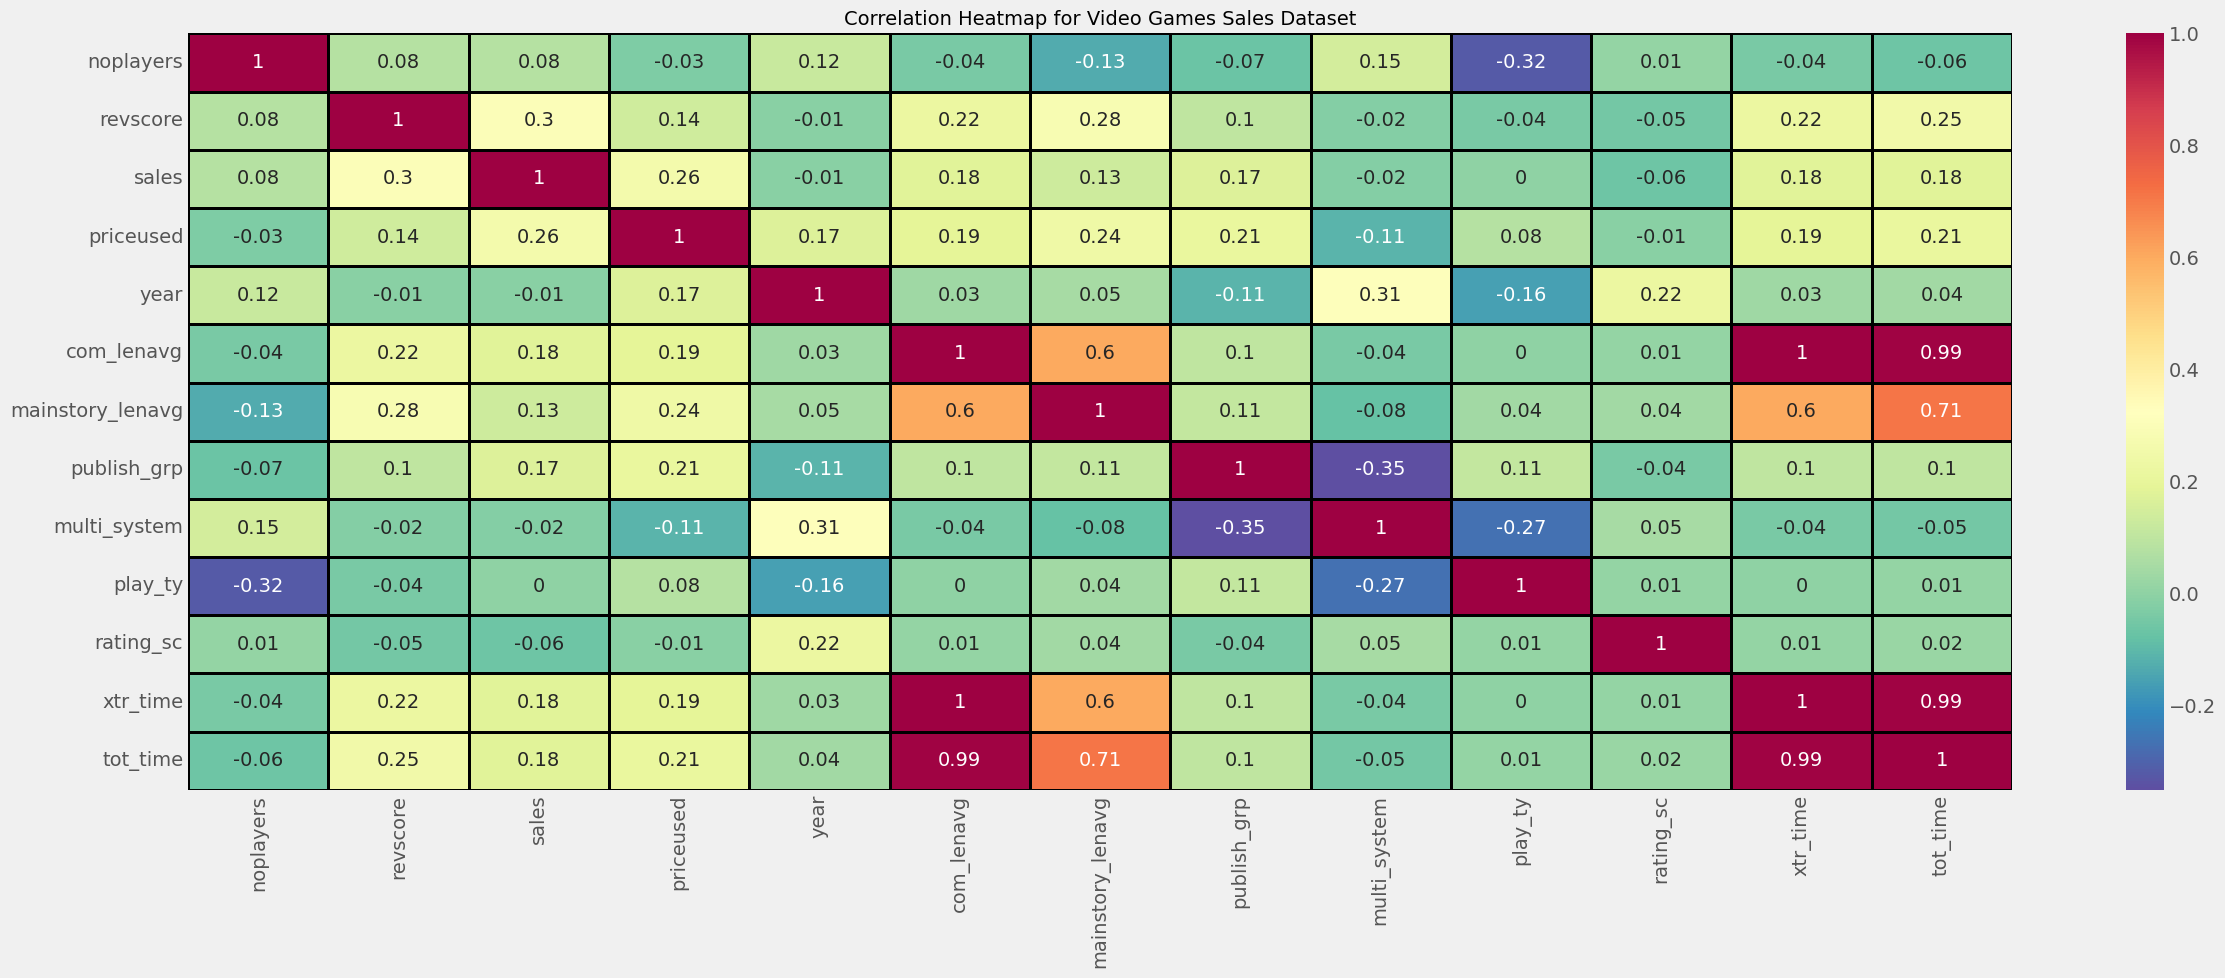

In [26]:
# Examination of features to understand relationships prior to modeling

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(df.corr().round(2), annot=True, cmap='Spectral_r', ax=ax, linecolor= 'black', linewidth = 1.0)
ax.set_title(f'Correlation Heatmap for Video Games Sales Dataset', color = 'black', fontsize= 14)
plt.tight_layout();

________________________________________________

### *** Statistical Analysis and Predictive Modeling *** ###

### *** A. Model, v0 | Baseline ***
1. The features in the linear regression baseline model appear to explain 30% of the explanatory relationship of the response variable sales or the number of game copies sold.
2. The linear regression prediction model's out-of-sample r2 score of 0.04 indicates a very low performance in predicting the total copies sold of games within the test set.
3. The decision tree regression, allowed to grow fully, performed perfect on the training set but indicated a negative relationship to the response value in the test set.
4. As witnessed in the  plotting, the baseline prediction models appeared to perform very poorly on the extreme outlier values.
5. We have set the constant value in the model to 0 because when all features, or x=0, then there are no sales, or y=0.

In [27]:
# creating a new dataframe before hot-encoding categorical variables
df1 = df.copy()

# Dropping Columns that won't be used in the modeling

# dropping the console column
df1.drop(columns = ['console'], inplace=True)

# dropping the rating column
df1.drop(columns = ['rating'], inplace=True)

# dropping the year columns and others
df1.drop(columns = ['year'], inplace=True)

df1.drop(columns = ['mainstory_lenavg','com_lenavg'], inplace = True)

df1.drop(columns=['publish'], inplace=True)

df1.drop(columns = ['game'], inplace=True)

# adding a constant to the model
df1['const'] = 0 


# assigning dummy variables to remaining categorical column
df1 = pd.get_dummies(data=df1,columns=['genre'],prefix='',prefix_sep='',drop_first=True)

In [28]:
tX0, vX0, tY0, vY0 = tts(df1.drop(['sales'], axis=1), df1['sales'], test_size = 0.2, random_state=123)

In [29]:
# Video games sales prediction model - v0 - Linear regression

mdl_0 = sm.OLS(tY0, tX0)
fmdl_0 = mdl_0.fit()
pY0 = fmdl_0.predict(vX0)

print(fmdl_0.summary(title='Video games sales prediction model - v0', alpha=.01))
print('')
print(f'Out of sample R^2 is {r2_score(vY0,pY0):.2f}')

                        Video games sales prediction model - v0                        
Dep. Variable:                  sales   R-squared (uncentered):                   0.311
Model:                            OLS   Adj. R-squared (uncentered):              0.300
Method:                 Least Squares   F-statistic:                              26.90
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                    2.53e-66
Time:                        01:04:08   Log-Likelihood:                         -1336.1
No. Observations:                 969   AIC:                                      2704.
Df Residuals:                     953   BIC:                                      2782.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.005      0.995]
-------------------------------------

In [30]:
# Video games sales prediction model - v0 - Decision Tree regression

# Prediction model - Decision Tree Regression
tree_0 = DecisionTreeRegressor(random_state=123).fit(tX0, tY0)
pred_train0 = tree_0.predict(tX0)
pred_test0 = tree_0.predict(vX0)
train_score0 = tree_0.score(tX0, tY0)
test_score0 = r2_score(vY0, pred_test0)
tree_0_dep = tree_0.get_depth()

print('The depth of the baseline tree is ' + str(tree_0_dep) +'.')
print('')
print('The train r^2 score of the baseline tree is ' + str(round(train_score0,2)))
print('The test r^2 score of the baseline tree is ' + str(round(test_score0,2)))


The depth of the baseline tree is 25.

The train r^2 score of the baseline tree is 1.0
The test r^2 score of the baseline tree is -0.84


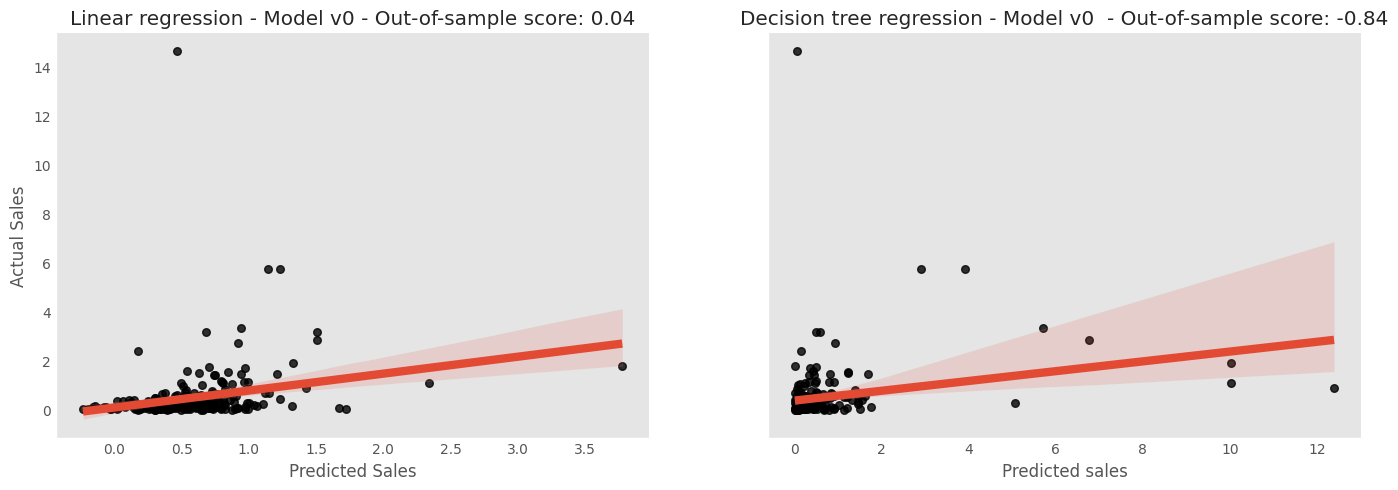

In [31]:
# Scatter plot - Results of the Video game sales Baseline prediction model v0
plt.style.use('ggplot')
colors = ['black']
plt.rcParams['figure.figsize'] = [20, 10]

fig, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize=(15,5))

# Linear regression
plt.subplot(1,2,1)
sns.regplot(x = pY0,y = vY0, scatter_kws={"s": 30, 'color': 'black'}, ax=ax1)
plt.title('Linear regression - Model v0 - Out-of-sample score: '+ str(round(r2_score(vY0,pY0),2)))
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.grid(visible=None)

# Decision tree regression
plt.subplot(1,2,2)
sns.regplot(x = pred_test0,y = vY0, scatter_kws={"s": 30, 'color': 'black'}, ax=ax2)
plt.title('Decision tree regression - Model v0  - Out-of-sample score: ' + str(round(r2_score(vY0, pred_test0),2)))
plt.xlabel("Predicted sales")
plt.ylabel("")
plt.grid(visible=None)

sns.despine();

_________________________________________

### *** B. Model, v1 | Scaled Values ***



Why: The dataset consisted of many numerical features that ranged extensivley in their values. Due to this, scaling of the values shold allow for the model to inptrept the numerical features with more homogeneity to one another and preventing certain values from being interpreted as more impacting the model than others due to large numerical values.

1. The features in the linear regression scaled value model not appear to explain 35% of the explanatory relationship of the response variable.

2. The linear regression prediction model's out-of-sample r2 score improved slighlty to 0.07 but still indicating a very low performance in predicting the copies sold of games in the test set.

3. Performing a grid search provided a number of hyperparameters to pass in the decision tree regression besides the default values. With the grid search paramaters passed, the model performed lower overall than the baseline on the training set at 0.35 but improved on the test set to a very low, but positive, 0.18.

In [32]:
# Model Adjustment (1) | Scaling the Values

df2 = df1.copy()

data_scaled = StandardScaler(with_mean=True, with_std=True).fit_transform(df2)
df_scaled = pd.DataFrame(data_scaled, columns=df2.columns + "_" + "Scl")
df2 = df2.join(df_scaled)
df2.drop(columns = ['revscore','priceused','tot_time', 'xtr_time', 'noplayers_Scl', 'rating_sc_Scl', 'publish_grp_Scl', 'multi_system_Scl', 'play_ty_Scl', 'const_Scl','Adventure_Scl','Educational_Scl','Racing_Driving_Scl','Role_Playing_Scl','Simulation_Scl',\
                    'Sports_Scl','Strategy_Scl', 'sales_Scl'], inplace=True)

In [33]:
tX1, vX1, tY1, vY1 = tts(df2.drop(['sales'], axis=1), df2['sales'], test_size = 0.2, random_state=123)

In [34]:
# Video games sales prediction model - v1 - Linear regression

mdl_1 = sm.OLS(tY1, tX1)
fmdl_1 = mdl_1.fit()
pY1 = fmdl_1.predict(vX1)

print(fmdl_1.summary(title='Video games sales prediction model - v1', alpha=.01))
print('')
print(f'Out of sample R^2 is {r2_score(vY1,pY1):.2f}')

                        Video games sales prediction model - v1                        
Dep. Variable:                  sales   R-squared (uncentered):                   0.363
Model:                            OLS   Adj. R-squared (uncentered):              0.352
Method:                 Least Squares   F-statistic:                              33.93
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                    4.88e-82
Time:                        01:04:11   Log-Likelihood:                         -1298.2
No. Observations:                 969   AIC:                                      2628.
Df Residuals:                     953   BIC:                                      2706.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.005      0.995]
-------------------------------------

In [35]:
#create a list of hyperparamenters to search through to find the best parameters

param_grid=[{'max_depth':[4,5,6,7,8,9,10], 'max_features':[6,7,8,9,10,11,12],'max_leaf_nodes': [4,5,6,7,8,9,10], 'min_samples_leaf': [1,2,3,4,5]}]

# set evaluation metric
score='r2'

# creating the grid search
# establishing a hyperparameter grid to search through for best results
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123), param_grid=param_grid, scoring=score,cv=5).fit(tX1,tY1)

# Create a dataframe from the grid search results to plot
gs_results = pd.DataFrame(gs.cv_results_)

# printing the best parameters results
print('Tuned Decision Tree Regression Best Parameters: {} , with an Accuracy of {}'.format(gs.best_params_, round(gs.best_score_,2)));


Tuned Decision Tree Regression Best Parameters: {'max_depth': 6, 'max_features': 12, 'max_leaf_nodes': 10, 'min_samples_leaf': 4} , with an Accuracy of 0.32


In [36]:
# Video games sales prediction model - v1 - Decision Tree regression - Default Tree

# Prediction model - Decision Tree Regression
tree_1 = DecisionTreeRegressor( random_state=123).fit(tX1, tY1)
pred_train1 = tree_1.predict(tX1)
pred_test1 = tree_1.predict(vX1)
train_score1 = tree_1.score(tX1, tY1)
test_score1 = r2_score(vY1, pred_test1)
tree_1_dep = tree_1.get_depth()

print('The depth of the v1 default tree is ' + str(tree_1_dep) +'.')
print('')
print('The train r^2 score of the baseline tree is ' + str(round(train_score1,2)))
print('The test r^2 score of the baseline tree is ' + str(round(test_score1,2)))

The depth of the v1 default tree is 25.

The train r^2 score of the baseline tree is 1.0
The test r^2 score of the baseline tree is -0.84


In [37]:
# Video games sales prediction model - v1 - Decision Tree regression - Hypertuned Tree

# Prediction model - Decision Tree Regression
tree_1 = DecisionTreeRegressor(max_depth = 4, max_features = 6, max_leaf_nodes = 5, min_samples_leaf = 4, random_state=123).fit(tX1, tY1)
pred_train1 = tree_1.predict(tX1)
pred_test1 = tree_1.predict(vX1)
train_score1 = tree_1.score(tX1, tY1)
test_score1 = r2_score(vY1, pred_test1)
tree_1_dep = tree_1.get_depth()

print('The depth of the v1 tuned tree is ' + str(tree_1_dep) +'.')
print('')
print('The train r^2 score of the v1 tuned is ' + str(round(train_score1,2)))
print('The test r^2 score of the v1 tuned is ' + str(round(test_score1,2)))


The depth of the v1 tuned tree is 3.

The train r^2 score of the v1 tuned is 0.35
The test r^2 score of the v1 tuned is 0.18


### *** C. Model, v2 | Genre Groupings ***

Why: Since some publishers may impact the modeling disproportionately due 
to their global market size, we have grouped publishers in the model into three groups by their similarities in revenue. Grouping of similar entities may alow for the model to better predict among the remaining differential features.

1. The explanatory factor of the model slighlty decreased to .33. This was most likely due to the fact that we removed the indepdent publisher variables from the previous model and placed them in to the limited number of groups.
2. The out-of-sanple score for the test prediction set monce again improved slightly t .10.
3. The baseline and adjusted grid search parameters resulted in poor performance. The decision tree regression out-of-sample score returned to negative for both.

In [38]:
# Model Adjustment (2) | Creating genre category groupings

df3 = df2.copy()

df3['genre'] = df['genre']

# grouping genres in to similar groupings
df3['genre'].replace(to_replace='Adventure',value='action_adv',inplace=True)
df3['genre'].replace(to_replace='Action', value='action_adv',inplace=True)
df3['genre'].replace(to_replace='Strategy', value='rp_sim_str', inplace=True)
df3['genre'].replace(to_replace='Simulation', value='rp_sim_str', inplace=True)
df3['genre'].replace(to_replace= 'Role_Playing', value='rp_sim_str', inplace=True)
df3['genre'].replace(to_replace= 'Racing_Driving', value='race_sport', inplace=True)
df3['genre'].replace(to_replace= 'Sports', value='race_sport', inplace=True)
df3 = df3[df3.genre != 'Educational'] # creates the final dataframe excluding the few educational games

# assigning dummy variables to categorical columns
df3 = pd.get_dummies(data=df3,columns=['genre'],prefix='',prefix_sep='',drop_first=True)

df3.drop(columns = ['Adventure','Educational','Racing_Driving','Role_Playing','Simulation','Sports','Strategy'], inplace=True);

In [39]:
tX2, vX2, tY2, vY2 = tts(df3.drop(['sales'], axis=1), df3['sales'], test_size = 0.2, random_state=123)

In [40]:
# Video games sales prediction model - v2 - Linear regression

mdl_2 = sm.OLS(tY2, tX2)
fmdl_2 = mdl_2.fit()
pY2 = fmdl_2.predict(vX2)

print(fmdl_2.summary(title='Video games sales prediction model - v2 ', alpha=.01))
print('')
print(f'Out of sample R^2 is {r2_score(vY2,pY2):.2f}')
print('')

                        Video games sales prediction model - v2                        
Dep. Variable:                  sales   R-squared (uncentered):                   0.344
Model:                            OLS   Adj. R-squared (uncentered):              0.337
Method:                 Least Squares   F-statistic:                              45.51
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                    7.54e-80
Time:                        01:04:53   Log-Likelihood:                         -1313.6
No. Observations:                 965   AIC:                                      2649.
Df Residuals:                     954   BIC:                                      2703.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.005      0.995]
--------------------------------------

In [41]:
#create a list of hyperparamenters to search through to find the best parameters

param_grid=[{'max_depth':[4,5,6,7,8,9,10], 'max_features':[6,7,8,9,10,11,12],'max_leaf_nodes': [4,5,6,7,8,9,10], 'min_samples_leaf': [1,2,3,4,5]}]

# set evaluation metric
score='r2'

# creating the grid search
# establishing a hyperparameter grid to search through for best results
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123), param_grid=param_grid, scoring=score,cv=5).fit(tX2,tY2)

# Create a dataframe from the grid search results to plot
gs_results = pd.DataFrame(gs.cv_results_)

# printing the best parameters results and r^2 score
print('Tuned Decision Tree Regression Best Parameters: {}, with an Accuracy of {}'.format(gs.best_params_, round(gs.best_score_,2)));

Tuned Decision Tree Regression Best Parameters: {'max_depth': 4, 'max_features': 8, 'max_leaf_nodes': 8, 'min_samples_leaf': 4}, with an Accuracy of 0.32


In [42]:
# Video games sales prediction model - v2 - Decision Tree regression - Deafult Tree

# Prediction model - Decision Tree Regression - With Best Parameters
tree_2 = DecisionTreeRegressor(random_state=123).fit(tX2, tY2)
pred_train2 = tree_2.predict(tX2)
pred_test2 = tree_2.predict(vX2)
train_score2 = tree_2.score(tX2, tY2)
test_score2 = tree_2.score(vX2,vY2)
tree_2_dep = tree_2.get_depth()

print('The depth of the default tree is ' + str(tree_2_dep) +'.')
print('')
print('The train r^2 score of the default tree is ' + str(round(train_score2,2)))
print('The test r^2 score of the default tree is ' + str(round(test_score2,2)))

The depth of the default tree is 21.

The train r^2 score of the default tree is 1.0
The test r^2 score of the default tree is -0.97


In [43]:
# Video games sales prediction model - v2 - Decision Tree regression - Hypertuned Tree

# Prediction model - Decision Tree Regression - With Best Parameters
tree_2 = DecisionTreeRegressor(max_depth = 4, max_features = 8, max_leaf_nodes = 8, min_samples_leaf = 4, random_state=123).fit(tX2, tY2)
pred_train2 = tree_2.predict(tX2)
pred_test2 = tree_2.predict(vX2)
train_score2 = tree_2.score(tX2, tY2)
test_score2 = tree_2.score(vX2,vY2)
tree_2_dep = tree_2.get_depth()

print('The depth of the v2 tuned tree is ' + str(tree_2_dep) +'.')
print('')
print('The train r^2 score of the v2 tuned  tree is ' + str(round(train_score2,2)))
print('The test r^2 score of the v2 tuned tree is ' + str(round(test_score2,2)))

The depth of the v2 tuned tree is 4.

The train r^2 score of the v2 tuned  tree is 0.48
The test r^2 score of the v2 tuned tree is -0.38


### *** D. Improved Model, v3 | Outliers removed ***

### 11. Observations from Improvement model, v3

Why: As witnessed in the basline prediction plots, the models had difficulty in predicting the correct values for the extreme observations. Additionally, in the EDA there were a number of values that seemed out of place and needed to be accounted for to produce a meaningful dataset for use in modeling. Therefore, the following conditional criteria helps to create a more accurate dataset that the model can be trained and tested on without the anomaly observations included. The model dataset now includes all games tht sold between 100,000 and 9 million copies, have a review score of greater than 45, average main game story lengths of at least 5 hours, and completionist game lengths of at least 4 hours. These conditions seem reasonable for the type of game that a publisher may consider pursuing and can provide solid starting criteria for the type of game to consider.

1. The adjusted r2 in the linear regression improved significantly to .51. An indication that the removing of the outliers imporved the model's ability to explain the response variable by the predictor variables.
2. The defined dataset showed significant improvement to the linear regression prediction model out-of-sample score to .53. Producing a model that is now able to predict the values for sales in the test set at a rate above pure chance.
4. For the decision tree regression prediction models, both the baseline and tunes trees witnessed significant improvement from the prior model with out-of-sample scores of .35 and .33.

In [44]:
# Model Adjustment (3) | Removing outlier observations ### 53%
 
df4 = df3.copy()

# removing outliers: Sales greater than 8 million and less than 100,000; Review Scores less than 45; Main story length greater than 5 hours; Completetionist length greater than 4 hours
df4 = df4.loc[(df['sales'] < 9) & (df['sales'] >= 0.1) & (df['revscore'] > 45) & (df['mainstory_lenavg'] > 5) & (df['com_lenavg'] > 4)] 

In [45]:
tX3, vX3, tY3, vY3 = tts(df4.drop(['sales'], axis=1), df4['sales'], test_size = 0.2, random_state=123)

In [46]:
# Video games sales prediction model - v3 - Linear regression

mdl_3 = sm.OLS(tY3, tX3)
fmdl_3 = mdl_3.fit()
pY3 = fmdl_3.predict(vX3)

print(fmdl_3.summary(title='Video games sales prediction model - v3 ', alpha=.01))
print('')
print(f'Out of sample R^2 is {r2_score(vY3,pY3):.2f}')
print('')

                        Video games sales prediction model - v3                        
Dep. Variable:                  sales   R-squared (uncentered):                   0.533
Model:                            OLS   Adj. R-squared (uncentered):              0.518
Method:                 Least Squares   F-statistic:                              35.53
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                    3.13e-50
Time:                        01:05:30   Log-Likelihood:                         -461.24
No. Observations:                 354   AIC:                                      944.5
Df Residuals:                     343   BIC:                                      987.0
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.005      0.995]
--------------------------------------

In [47]:
#create a list of hyperparamenters to search through to find the best parameters

param_grid=[{'max_depth':[4,5,6,7,8,9,10], 'max_features':[6,7,8,9,10,11,12],'max_leaf_nodes': [4,5,6,7,8,9,10], 'min_samples_leaf': [1,2,3,4,5]}]

# set evaluation metric
score='r2'

# creating the grid search
# establishing a hyperparameter grid to search through for best results
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123), param_grid=param_grid, scoring=score,cv=5).fit(tX3,tY3)

# Create a dataframe from the grid search results to plot
gs_results = pd.DataFrame(gs.cv_results_)

# printing the best parameters results and r^2 score
print('Tuned Decision Tree Regression Best Parameters: {}, with an Accuracy of {}'.format(gs.best_params_, round(gs.best_score_,2)));

Tuned Decision Tree Regression Best Parameters: {'max_depth': 4, 'max_features': 8, 'max_leaf_nodes': 8, 'min_samples_leaf': 1}, with an Accuracy of 0.12


In [48]:
# Video games sales prediction model - v3 - Decision Tree regression - Default

# Prediction model - Decision Tree Regression - With Best Parameters
tree_3 = DecisionTreeRegressor(random_state=123).fit(tX3, tY3) # *** default values performed better than hypertuned *** #
pred_train3 = tree_3.predict(tX3)
pred_test3 = tree_3.predict(vX3)
train_score3 = tree_3.score(tX3, tY3)
test_score3 = tree_3.score(vX3,vY3)
tree_3_dep = tree_3.get_depth()

print('The depth of the default tree is ' + str(tree_3_dep) +'.')
print('')
print('The train r^2 score of the default tree is ' + str(round(train_score3,2)))
print('The test r^2 score of the default tree is ' + str(round(test_score3,2)))

The depth of the default tree is 21.

The train r^2 score of the default tree is 1.0
The test r^2 score of the default tree is 0.31


In [49]:
# Video games sales prediction model - v3 - Decision Tree regression - Hypertuned

# Prediction model - Decision Tree Regression - With Best Parameters
tree_3 = DecisionTreeRegressor(max_depth = 4, max_features = 8, max_leaf_nodes = 8, min_samples_leaf = 1, random_state=123).fit(tX3, tY3) # *** default values performed better than hypertuned *** #
pred_train3 = tree_3.predict(tX3)
pred_test3 = tree_3.predict(vX3)
train_score3 = tree_3.score(tX3, tY3)
test_score3 = tree_3.score(vX3,vY3)
tree_3_dep = tree_3.get_depth()

print('The depth of the v3 tuned tree is ' + str(tree_3_dep) +'.')
print('')
print('The train r^2 score of the v3 tuned tree is ' + str(round(train_score3,2)))
print('The test r^2 score of the v3 tuned tree is ' + str(round(test_score3,2)))

The depth of the v3 tuned tree is 4.

The train r^2 score of the v3 tuned tree is 0.54
The test r^2 score of the v3 tuned tree is 0.33


### *** E. Improved Model, v4 | Insignificant variables removed ***
Why: Following the creating of the succesufl prediction model from the removal of outliers, further cleaning of the dataset by removing ingignificant vraibles from the previous analysis output allows for the subsequent model to analyze by passing truly significant factors and reducing unncessary noise.

1. The explanatory aspect of the model is once again around 50% with an adjusted r2 score of .501. The slight reduction is most likel due to the removal of the insignificant noisy features from the previous model results.
2. The out of sample score slightly decreased to .51, however it has maintained it's ability to produce a score above the mere chance threshold in predicting the response values.
3. The baseline tree performed very poorly however the tuned tree witnessed it's best performance with an out of sample score of .5. This score was even better than the train score of .47.

In [50]:
# Model Adjustment (4) | Removing insignificant variables

df5 = df4.copy()

df5.drop(columns = ['tot_time_Scl', 'xtr_time_Scl', 'race_sport'], inplace=True);

In [51]:
tX4, vX4, tY4, vY4 = tts(df5.drop(['sales'], axis=1), df5['sales'], test_size = 0.2, random_state=123)

In [52]:
# Video games sales prediction model - v4 - Linear regression

mdl_4 = sm.OLS(tY4, tX4)
fmdl_4 = mdl_4.fit()
pY4 = fmdl_4.predict(vX4)

print(fmdl_4.summary(title='Video games sales prediction model - v4 ', alpha=.01))
print('')
print(f'Out of sample R^2 is {r2_score(vY4,pY4):.2f}')
print('')

                        Video games sales prediction model - v4                        
Dep. Variable:                  sales   R-squared (uncentered):                   0.517
Model:                            OLS   Adj. R-squared (uncentered):              0.506
Method:                 Least Squares   F-statistic:                              46.26
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                    2.80e-50
Time:                        01:06:05   Log-Likelihood:                         -467.12
No. Observations:                 354   AIC:                                      950.2
Df Residuals:                     346   BIC:                                      981.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.005      0.995]
--------------------------------------

In [53]:
#create a list of hyperparamenters to search through to find the best parameters

param_grid=[{'max_depth':[4,5,6,7,8,9,10], 'max_features':[6,7,8,9,10,11,12],'max_leaf_nodes': [4,5,6,7,8,9,10], 'min_samples_leaf': [1,2,3,4,5]}]

# set evaluation metric
score='r2'

# creating the grid search
# establishing a hyperparameter grid to search through for best results
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123), param_grid=param_grid, scoring=score,cv=5).fit(tX4,tY4)

# Create a dataframe from the grid search results to plot
gs_results = pd.DataFrame(gs.cv_results_)

# printing the best parameters results and r^2 score
print('Tuned Decision Tree Regression Best Parameters: {}, with an Accuracy of {}'.format(gs.best_params_, round(gs.best_score_,2)));

Tuned Decision Tree Regression Best Parameters: {'max_depth': 4, 'max_features': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 5}, with an Accuracy of 0.11


In [54]:
# Video games sales prediction model - v4 - Decision Tree regression

# Prediction model - Decision Tree Regression - With Best Parameters
tree_4 = DecisionTreeRegressor(random_state=123).fit(tX4, tY4)
pred_train4 = tree_4.predict(tX4)
pred_test4 = tree_4.predict(vX4)
train_score4 = tree_4.score(tX4, tY4)
test_score4 = tree_4.score(vX4,vY4)
tree_4_dep = tree_4.get_depth()

print('The depth of the default tree is ' + str(tree_4_dep) +'.')
print('')
print('The train r^2 score of the default tree is ' + str(round(train_score4,2)))
print('The test r^2 score of the default tree is ' + str(round(test_score4,2)))

The depth of the default tree is 19.

The train r^2 score of the default tree is 0.99
The test r^2 score of the default tree is -0.51


In [55]:
# Video games sales prediction model - v4 - Decision Tree regression

# Prediction model - Decision Tree Regression - With Best Parameters
tree_4 = DecisionTreeRegressor(max_depth = 4, max_features = 6, max_leaf_nodes = 6, min_samples_leaf = 5, random_state=123).fit(tX4, tY4)
pred_train4 = tree_4.predict(tX4)
pred_test4 = tree_4.predict(vX4)
train_score4 = tree_4.score(tX4, tY4)
test_score4 = tree_4.score(vX4,vY4)
tree_4_dep = tree_4.get_depth()

print('The depth of the v4 tuned tree is ' + str(tree_4_dep) +'.')
print('')
print('The train r^2 score of the v4 tuned tree is ' + str(round(train_score4,2)))
print('The test r^2 score of the v4 tuned tree is ' + str(round(test_score4,2)))

The depth of the v4 tuned tree is 3.

The train r^2 score of the v4 tuned tree is 0.47
The test r^2 score of the v4 tuned tree is 0.5


### *** F. Improved Model, v5 | Final Hyperparamter Tuning ***

Why: Due to the computational requirements for selecting hyperparamters we have broken up this process in to two steps to attempt to locate all best paramters that will result in of the best version of the decsion tree regression prediction model.

1. The additional hyperparameters passed through the previous decision tree regression model resulted in a decrease in the out of sample score of 0.27 for the model.
2. Due to the decrease in the oos score, the previous version is the best decision tree regression model approach. The additional pramaters passed may indicated that too much tuning was performed to try and obtain and optimal oucome.

In [56]:
#create a list of hyperparamenters to search through to find the best parameters

param_grid=[{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'splitter': ['best', 'random'], 'min_samples_split': [2,3,4,5], 'min_weight_fraction_leaf': [0.0,0.05,0.1,0.15,0.2]}]

# set evaluation metric
score='r2'

# creating the grid search
# establishing a hyperparameter grid to search through for best results
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123), param_grid=param_grid, scoring=score,cv=5).fit(tX4,tY4)

# Create a dataframe from the grid search results to plot
gs_results = pd.DataFrame(gs.cv_results_)

# printing the best parameters results and r^2 score
print('Tuned Decision Tree Regression Best Parameters: {}, with an Accuracy of {}'.format(gs.best_params_, round(gs.best_score_,2)));

Tuned Decision Tree Regression Best Parameters: {'criterion': 'absolute_error', 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}, with an Accuracy of 0.07


In [57]:
tree_5 = DecisionTreeRegressor(max_depth = 4, max_features = 6, max_leaf_nodes = 6, min_samples_leaf = 5, criterion = 'absolute_error', min_samples_split = 2, min_weight_fraction_leaf = 0.1, random_state=123).fit(tX4, tY4)
pred_train5 = tree_5.predict(tX4)
pred_test5 = tree_5.predict(vX4)
train_score5 = tree_5.score(tX4, tY4)
test_score5 = tree_5.score(vX4,vY4)
tree_5_dep = tree_5.get_depth()

print('The depth of the v5 parameters tree is ' + str(tree_5_dep) +'.')
print('')
print('The train r^2 score of the tree is ' + str(round(train_score5,2)))
print('The test r^2 score of the tree is ' + str(round(test_score5,2)))

The depth of the v5 parameters tree is 4.

The train r^2 score of the tree is 0.1
The test r^2 score of the tree is 0.27


### *** G. Best Model Performance ***

*** Summary ***

In the case of the best prediction model, linear regression v3 produces the highest out-of-sample score of 0.53. This score indicates that the model does perform better than mere chance when assigning predicted values to the observations in the test set. Furthermore, the statistical analysis from the regression results indicates that the selected features do explain a significant amount about the response variable in the study. While not perfect, it does produce confidence that supplementing these model features with more significant variables could result in an ever more highly explanatory outcome. 

The model's performance indicated that there was difficulty in applying accurately predicted values to some of the most extreme cases. However, it displayed difficulty in some of the more typical cases as well. The reasons for this remain a bit unclear but the range of values in the overall dataset, as well as the bunching of the ranges, are certain ends may explain some of the difficulty that the model had in applying the correct values. If the dataset can be introduced with even more observations that help to normalize the distribution of the response variable this may lead to significant improvements in the model's predictive accuracy.

Given the limited records in the current dataset, as well as the well-defined but rather limited number of features, the result of a predictive model that produces accuracy beyond mere chance is a celebrated result. There are many steps that can be taken to improve this model, but a well-established starting point has been created nonetheless. We welcome the opportunity to further iterate and improve the model to the benefit of our future partners and interested parties.

*** Plotted models ***

Visually it is represented that the linear regression predictive model performs satisfactorily in its overall predictive approach. There is a moderately strong linear relationship displayed between the actual and predicted values and the model appears to perform best at predicting values around 1.5 to 2.5 million in sales. 

Interestingly enough, while the model does appear to predict the values at an amount less than their actual figures, it does so at a nearly consistent amount of ~50,000. The highest figure of sales is predicted at amounts much below their actual values which may be impacting the model's accuracy. As a word of note, it would seem that it would be more desirable for the model to predict values less than those that they actually are rather than the reverse and predict values over those that they actually see. The visual output indicates that the model does have room for improvment but displays a welcomed result.

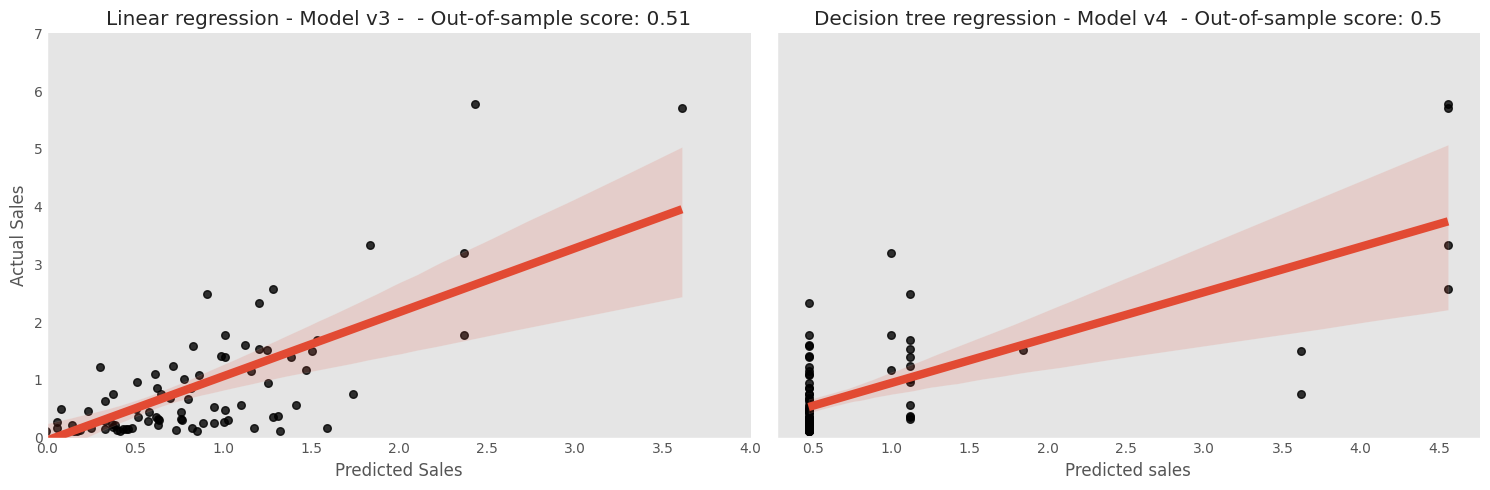

In [58]:
# Models of Best Fit - Linear Regression and Decision Tree
# Scatter plot - Results of the Video game sales prediction model
plt.style.use('ggplot')
colors = ['black']
plt.rcParams['figure.figsize'] = [20, 10]

fig, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize=(15,5))

# Linear regression
plt.subplot(1,2,1)
sns.regplot(x = pY3,y = vY3, scatter_kws={"s": 30, 'color': 'black'}, ax=ax1)
plt.title('Linear regression - Model v3 -  - Out-of-sample score: '+ str(round(r2_score(vY3,pY3),2)))
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
ax1.set_xlim([0, 4])
ax1.set_ylim([0, 7])
plt.grid(visible=None)

# Decision tree regression
plt.subplot(1,2,2)
sns.regplot(x = pred_test4,y = vY4, scatter_kws={"s": 30, 'color': 'black'}, ax=ax2)
plt.title('Decision tree regression - Model v4  - Out-of-sample score: ' + str(round(test_score4,2)))
plt.xlabel("Predicted sales")
plt.ylabel("")
plt.grid(visible=None)

plt.tight_layout()
sns.despine();

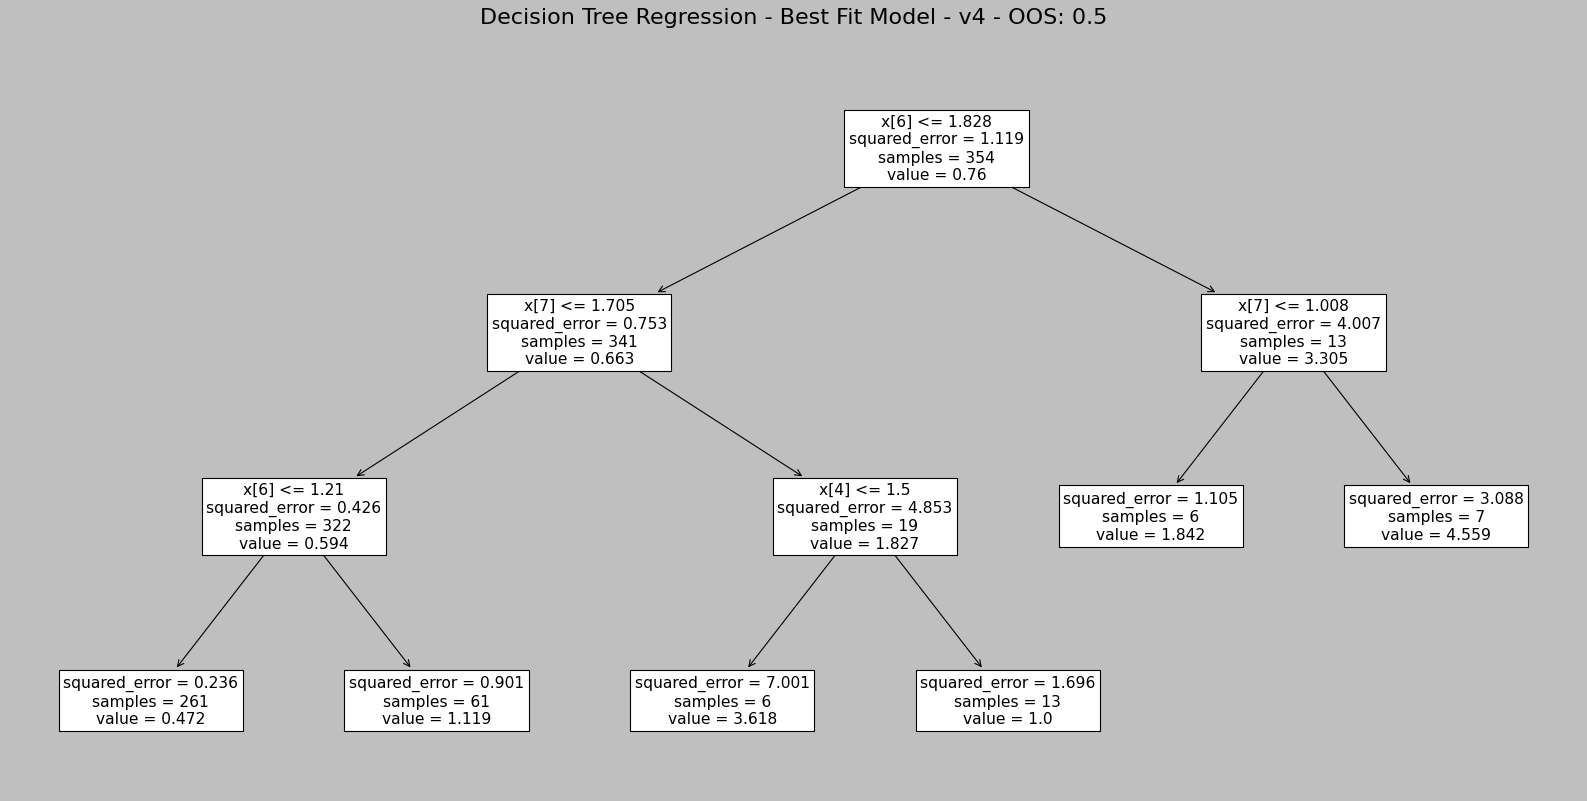

In [59]:
# Full decision tree plot - Model v4

plt.style.use('classic')
fig = plt.figure(figsize=(20,10))
tmp_tree = sk.tree.plot_tree(tree_4, fontsize = 14)
fig.suptitle("Decision Tree Regression - Best Fit Model - v4 - OOS: " + str(round(test_score4,2)), size = 20, y=1)
plt.tight_layout()
plt.show();

### *** Confidence Interval ***
The following confidence interval output displays the value ranges, at a 95% confidence level, that each explanatory variable affects upon the response variable, with all other aspects held constant. The ranges can help the potential publsihers understand how the feature considerations, as they apply to game chanracteristics, may have a positive or negative impact on the copies sold per game.

The error values indicate that the  model displayed an average error amount of around 49,000 copies sold as calculated by the MSE and MAE, and 70,000 copies for the RMSE.

In [60]:
alpha = 0.05 # 95% confidence interval
conf_interval = round(fmdl_3.conf_int(alpha),2)
mse = round(sk.metrics.mean_squared_error(vY3, pY3),2) * 1000000
rmse = round(math.sqrt(sk.metrics.mean_squared_error(vY3, pY3)),2) * 1000000
mae = round(sk.metrics.mean_absolute_error(vY3,pY3),2) * 1000000
print('Linear Regression Best Fit Model - v4 - Additional Evaluation Metrics')
print('Converted to Sales (m)')
print('')
print('95% confidence interval')
print(conf_interval * 100000)
print('')
print('MSE: ' + str(mse))
print('RMSE ' + str(rmse))
print("MAE: " + str(mae))

Linear Regression Best Fit Model - v4 - Additional Evaluation Metrics
Converted to Sales (m)

95% confidence interval
                      0         1
noplayers        6000.0   24000.0
publish_grp     10000.0   32000.0
multi_system    15000.0   56000.0
play_ty          1000.0   49000.0
rating_sc      -28000.0   -5000.0
const              -0.0       0.0
revscore_Scl    31000.0   55000.0
priceused_Scl   12000.0   34000.0
xtr_time_Scl   -11000.0  118000.0
tot_time_Scl  -111000.0   24000.0
race_sport     -26000.0   29000.0
rp_sim_str     -50000.0    3000.0

MSE: 510000.0
RMSE 720000.0
MAE: 510000.0


### *** Prediction Test Set *** ###

The following table displays the prediction sales values against the actual sales values and the resulting difference between these two amounts. Additionally, it provides information about the games used in the test prediction set.

In [61]:
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 89)

df_actual = pd.Series(vY3)
df_actual = pd.DataFrame(vY3 * 1000000, columns = ['sales'])
df_pred = pd.DataFrame(pY3 * 1000000, columns = ['predict'])
prediction_results = df_actual.merge(round(df_pred['predict'],2), left_index=True, right_index=True)
prediction_results['diff'] = round(prediction_results['predict'] - prediction_results['sales'],2)
prediction_results.merge(df['game'], left_index=True, right_index=True).merge(df['genre'], left_index=True, right_index=True).merge(df['publish'], left_index=True, right_index=True)

#mapper =  {'sales': '{0:.f}', 'predict': '{0:.2f}', 'diff': '{0:.2f}'}
#prediction_results.style.format(mapper)

,sales,predict,diff,game,genre,publish
36,950000.0,1252435.05,302435.05,Need for Speed: Most Wanted,Racing_Driving,EA
187,860000.0,817719.12,-42280.88,Fight Night Round 3,Sports,EA
597,270000.0,1006285.50,736285.50,Contra 4,Action,Konami
60,370000.0,1311848.88,941848.88,Kirby: Canvas Curse,Action,Nintendo
972,330000.0,-155202.31,-485202.31,The Chronicles of Narnia: Prince Caspian,Role_Playing,Disney
202,660000.0,801673.38,141673.38,Tetris DS,Strategy,Nintendo
421,5770000.0,2433767.85,-3336232.15,Call of Duty 4: Modern Warfare,Action,Activision
965,360000.0,619903.14,259903.14,Spider-Man: Web of Shadows,Action,Activision
32,1220000.0,298910.90,-921089.10,Pokmon Mystery Dungeon: Blue Rescue Team,Role_Playing,Nintendo
78,270000.0,56968.82,-213031.18,X-Men: Legends II - Rise of Apocalypse,Role_Playing,Activision


### *** Logistic Regression ***

In [93]:
df_log = df2.copy()

df_log['genre'] = df['genre']

# grouping genres in to similar groupings
df_log['genre'].replace(to_replace='Adventure',value='action_adv',inplace=True)
df_log['genre'].replace(to_replace='Action', value='action_adv',inplace=True)
df_log['genre'].replace(to_replace='Strategy', value='rp_sim_str', inplace=True)
df_log['genre'].replace(to_replace='Simulation', value='rp_sim_str', inplace=True)
df_log['genre'].replace(to_replace= 'Role_Playing', value='rp_sim_str', inplace=True)
df_log['genre'].replace(to_replace= 'Racing_Driving', value='race_sport', inplace=True)
df_log['genre'].replace(to_replace= 'Sports', value='race_sport', inplace=True)
df_log = df_log[df_log.genre != 'Educational'] # creates the final dataframe excluding the few educational games

# assigning dummy variables to categorical columns
df_log = pd.get_dummies(data=df_log,columns=['genre'],prefix='',prefix_sep='',drop_first=True)

# Add sales prediction factor to sales
df_log['over_mil'] = np.where(df_log['sales'] > 1,1,0)

df_log.drop(columns = ['Adventure','Educational','Racing_Driving','Role_Playing','Simulation','Sports','Strategy','sales','const'], inplace=True);

In [95]:
# Creating model

tX_l1, vX_l1, tY_l1, vY_l1 = tts(df_log.drop(['over_mil'], axis=1), df_log['over_mil'], test_size = 0.2, random_state=123)

In [96]:
# Logistic regression model summary

md_l1 = sm.Logit(tY_l1, tX_l1).fit()
print(md_l1.summary(title='Video Game Sales Prediction Logistic v1', alpha=.05))

Optimization terminated successfully.
         Current function value: 0.303815
         Iterations 7
                   Video Game Sales Prediction Logistic v1                    
Dep. Variable:               over_mil   No. Observations:                  965
Model:                          Logit   Df Residuals:                      954
Method:                           MLE   Df Model:                           10
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.1487
Time:                        01:25:52   Log-Likelihood:                -293.18
converged:                       True   LL-Null:                       -344.40
Covariance Type:            nonrobust   LLR p-value:                 1.763e-17
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
noplayers        -0.0325      0.096     -0.340      0.734      -0.220       0.155
publish_grp      -0.

Confusion matrix:
       Pred-  Pred+
True-    214      3
True+     17      8
Out of sample accuracy: 0.92 and AUC:0.81


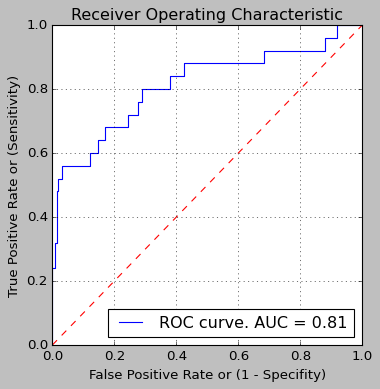

In [103]:
# Creating prediction probabilities and labels

pY_prob_l1 = md_l1.predict(vX_l1)
pY_prob_l1 = pY_prob_l1
pY_l1 = (pY_prob_l1 > 0.5) * 1
AUC = roc_auc_score(vY_l1, pY_prob_l1)

# Creating confusion matrix

dfCM = pd.DataFrame(confusion_matrix(vY_l1, pY_l1), index=['True-','True+'], columns=['Pred-','Pred+'])
print(f'Confusion matrix:\n{dfCM}')
print(f'Out of sample accuracy: {np.mean(pY_l1 == vY_l1):.2f} and AUC:{AUC:.2f}')

# Creating ROC & AUC plot

fpr, tpr, thresholds = roc_curve(vY_l1, pY_prob_l1)

plt.rcParams['figure.figsize'] = [5, 5]
ax = pd.DataFrame([fpr, tpr], index=['fpr','tpr']).T.plot(
    'fpr','tpr', kind='line', grid=True, title='Receiver Operating Characteristic', label=f'ROC curve. AUC = {AUC:.2f}');

ax.plot([0, 1], [0, 1], 'r--');  # random predictions curve
ax.set_ylabel('True Positive Rate or (Sensitivity)');
ax.set_xlabel('False Positive Rate or (1 - Specifity)');

In [104]:
df_prob = pd.Series(pY_prob_l1)
df_prob = pd.DataFrame(df_prob, columns=['prob'])
df_pred = pd.DataFrame(pY_l1, columns=['over_mil'])
prediction_results =df_prob.merge(df_pred['over_mil'], left_index=True, right_index=True)
prediction_results = prediction_results.merge(df['game'], left_index=True, right_index=True).merge(df['sales'], left_index=True, right_index=True)
prediction_results.sort_values(['prob'], ascending=False)

,prob,over_mil,game,sales
835,0.914750,1,Super Smash Bros.: Brawl,5.71
838,0.786765,1,Gears of War 2,3.90
836,0.694297,1,Call of Duty: World at War,4.58
427,0.692747,1,Guitar Hero III: Legends of Rock,3.19
178,0.626880,1,Dead Rising,1.16
...,...,...,...,...
1113,0.004086,0,NFL Tour,0.10
134,0.004063,0,Marvel Nemesis: Rise of the Imperfects,0.08
120,0.003726,0,ATV Quad Frenzy,0.11
1016,0.002954,0,Turning Point: Fall of Liberty,0.24


In [107]:
# creating a new dataframe before hot-encoding categorical variables
df_log2 = df.copy()

# Dropping Columns that won't be used in the modeling

# dropping the console column
df_log2.drop(columns = ['console'], inplace=True)

# dropping the rating column
df_log2.drop(columns = ['rating'], inplace=True)

# dropping the year columns and others
df_log2.drop(columns = ['year'], inplace=True)

df_log2.drop(columns = ['mainstory_lenavg','com_lenavg'], inplace = True)

df_log2.drop(columns=['publish'], inplace=True)

df_log2.drop(columns = ['game'], inplace=True)

# Add sales prediction factor to sales
df_log2['over_mil'] = np.where(df_log2['sales'] > 1,1,0)

df_log2.drop(columns = ['sales'], inplace=True)

# assigning dummy variables to remaining categorical column
df_log2 = pd.get_dummies(data=df_log2,columns=['genre'],prefix='',prefix_sep='',drop_first=True)

In [108]:
# Creating model

tX_l2, vX_l2, tY_l2, vY_l2 = tts(df_log2.drop(['over_mil'], axis=1), df_log2['over_mil'], test_size = 0.2, random_state=123)

In [109]:
# Logistic regression model summary

md_l2 = sm.Logit(tY_l2, tX_l2).fit()
print(md_l2.summary(title='Video Game Sales Prediction Logistic v2', alpha=.05))

         Current function value: 0.324086
         Iterations: 35
                   Video Game Sales Prediction Logistic v2                    
Dep. Variable:               over_mil   No. Observations:                  969
Model:                          Logit   Df Residuals:                      953
Method:                           MLE   Df Model:                           15
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                 0.07284
Time:                        02:00:31   Log-Likelihood:                -314.04
converged:                      False   LL-Null:                       -338.71
Covariance Type:            nonrobust   LLR p-value:                 1.541e-05
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
noplayers          0.0661      0.094      0.704      0.481      -0.118       0.250
revscore           0.0044      0.007      0.657      

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Confusion matrix:
       Pred-  Pred+
True-    212      2
True+     27      2
Out of sample accuracy: 0.88 and AUC:0.66


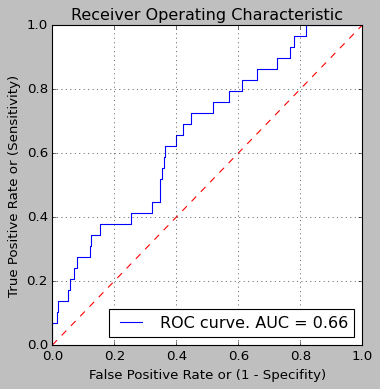

In [110]:
# Creating prediction probabilities and labels

pY_prob_l2 = md_l2.predict(vX_l2)
pY_prob_l2 = pY_prob_l2
pY_l2 = (pY_prob_l2 > 0.5) * 1
AUC = roc_auc_score(vY_l2, pY_prob_l2)

# Creating confusion matrix

dfCM = pd.DataFrame(confusion_matrix(vY_l2, pY_l2), index=['True-','True+'], columns=['Pred-','Pred+'])
print(f'Confusion matrix:\n{dfCM}')
print(f'Out of sample accuracy: {np.mean(pY_l2 == vY_l2):.2f} and AUC:{AUC:.2f}')

# Creating ROC & AUC plot

fpr, tpr, thresholds = roc_curve(vY_l2, pY_prob_l2)

plt.rcParams['figure.figsize'] = [5, 5]
ax = pd.DataFrame([fpr, tpr], index=['fpr','tpr']).T.plot(
    'fpr','tpr', kind='line', grid=True, title='Receiver Operating Characteristic', label=f'ROC curve. AUC = {AUC:.2f}');

ax.plot([0, 1], [0, 1], 'r--');  # random predictions curve
ax.set_ylabel('True Positive Rate or (Sensitivity)');
ax.set_xlabel('False Positive Rate or (1 - Specifity)');

In [111]:
df_prob = pd.Series(pY_prob_l2)
df_prob = pd.DataFrame(df_prob, columns=['prob'])
df_pred = pd.DataFrame(pY_l1, columns=['over_mil'])
prediction_results =df_prob.merge(df_pred['over_mil'], left_index=True, right_index=True)
prediction_results = prediction_results.merge(df['game'], left_index=True, right_index=True).merge(df['sales'], left_index=True, right_index=True)
prediction_results.sort_values(['prob'], ascending=False)

,prob,over_mil,game,sales
681,5.647969e-01,1,Disgaea: Afternoon of Darkness,0.15
249,4.098024e-01,0,Tenchu Z,0.28
178,3.956372e-01,1,Dead Rising,1.16
167,3.675161e-01,1,Grand Theft Auto: Vice City Stories,1.72
1166,3.579203e-01,0,Let's Tap,0.06
...,...,...,...,...
240,5.472174e-03,0,Killzone: Liberation,0.32
1169,5.358835e-03,0,Worms: A Space Oddity,0.05
797,5.188899e-03,0,Octomania,0.04
991,1.557444e-10,0,Condemned 2: Bloodshot,0.29



### *** G. Key takeaways and recommendations ***

**For our business leadership**, we have identified a number of key insight areas around the factors that drive game sales. Such factors include what may seem to be benign decisions as whether to release the game for multiple systems, the maximum number of players that can enjoy the game, or even the rating score the game receives from the ESRB board. All matters are surely considered when deciding what type of game to pursue. However, we have shown that each should still be decided with the appropriate focus placed upon these statistically significant decisions as they indicate measurable impact upon the overall sales for a game. Not to mention that additional factors outside of the game's control as the review score or the perceived future value of the title will continue to impact sales throughout the game's lifespan.


**For producing a good prediction model**, we had to make sure to remove outliers that were impacting the prediction accuracy. The existence of outliers is not unexpected but should be understood that these instances may be quite difficult to anticipate. In most cases, games to be sold will not fall into these outlier categories. Therefore, the selected criteria that were used to create a model that produced a predictive capability should be considered more of the typical nature that most games can expect. This criterion can serve as a great starting point as publishers begin the process of deciding the type of games to develop. While there is no hard and fast rule to producing a game, as witnessed by the many different game types and genres in the dataset, certain features can be applied in ways that may help publishers minimize the uncertainty in sales outcome, to the best degree possible. 

    
**To better improve the model's ability to accurately predict the sales on new game data**, it is imperative that further features be brought in to supplement this beginning model. Such features may include additional aspects related to the marketing around a game, advertising dollars incurred or anticipated, commercial exposure measured through awareness metrics, price of the game at the time of release, pre-sales figures to better understand anticipated demand, or any other feature that may help the model to identify the additional significant factors that drive game sales.

### References

https://datagy.io/python-count-occurrences-in-list/
https://seaborn.pydata.org/generated/seaborn.regplot.html
https://stackoverflow.com/questions/75440187/create-a-new-column-in-pandas-based-on-count-of-other-columns-and-a-fixed-specif
https://stackoverflow.com/questions/29836477/pandas-create-new-column-with-count-from-groupby
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
https://www.statology.org/read-interpret-regression-table/
https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
https://stackoverflow.com/questions/59916601/how-to-display-whole-table-in-the-output-in-jupyter-notebook
https://stackoverflow.com/questions/29623171/simple-prediction-using-linear-regression-with-python
https://stackoverflow.com/questions/32970610/how-to-extend-the-space-for-y-ticks-in-barh-python-matplotlib
https://stackoverflow.com/questions/51565320/suppress-output-in-matplotlib#53214092
https://stackoverflow.com/questions/53162/how-can-i-do-a-line-break-line-continuation-in-python
https://stackoverflow.com/questions/29836477/pandas-create-new-column-with-count-from-groupby
https://stackoverflow.com/questions/33049884/how-to-plot-2-seaborn-lmplots-side-by-side
https://stats.stackexchange.com/questions/253334/how-to-solve-multicollinearity-problem-in-a-linear-regression
https://stackoverflow.com/questions/54302895/efficiently-calculate-the-difference-between-two-rows-in-dataframe
https://stackoverflow.com/questions/49975524/get-model-predict-values-in-python
https://stackoverflow.com/questions/29623171/simple-prediction-using-linear-regression-with-python
https://stats.stackexchange.com/questions/86314/higher-r2-value-on-test-data-than-training-data/320519#320519
https://stats.stackexchange.com/questions/335295/why-is-constant-important-in-machine-learning-linear-regression
https://stackoverflow.com/questions/3777861/how-to-set-the-y-axis-limit
https://stackoverflow.com/questions/57978791/how-to-get-predicted-values-along-with-test-data-and-visualize-actual-vs-predic